# Input
  
|  Variable | Meaning |
|---|---|
| `K` | the weight factor of experts' confidence indicators |
|  `R` | the marginal level of consistency |
|  `xi` | confidence interval radius | 
| `s` | levels of corresponding variable |
  
Data is inputed as a table, where each row represents evaluation of single expert and each column represents $\mu_{nps}$ and $v_{nps}$ of each level.  
  
$\mu_{nps}$ - the expert's estimate that the criterion will take the value from the corresponding level $s=1,7$ ($0 \leq \mu_{nps} \leq 1$);  
$v_{nps}$ - the degree of confidence of the expert in each answer given ($0 \leq v_{nps} \leq 1$).
  
Example of the table format (for single specific product):

<table>
  <tr>
    <td rowspan = 3><b>Expert</b></td>
    <td colspan=14><b>Effectivity</b></td>
  </tr>
  <tr>
    <td colspan=2>Extremely Unefficient</td>
    <td colspan=2>Very Unefficient</td> 
    <td colspan=2>Unefficient</td>
    <td colspan=2>Averagly Efficient</td>  
    <td colspan=2>Efficient</td>
    <td colspan=2>Very Efficient</td>
    <td colspan=2>Extremly Efficient</td>
  </tr>
  <tr>
    <td> $\mu_{k1}$
    <td> $v_{k1}$  
    <td> $\mu_{k2}$
    <td> $v_{k2}$
    <td> $\mu_{k3}$
    <td> $v_{k3}$  
    <td> $\mu_{k4}$
    <td> $v_{k4}$
    <td> $\mu_{k5}$
    <td> $v_{k5}$
    <td> $\mu_{k6}$
    <td> $v_{k6}$  
    <td> $\mu_{k7}$
    <td> $v_{k7}$        
  </tr>
  <tr> 
    <td>Expert 1 
    <td>0,55 
    <td>1,00 
    <td>0,75 
    <td>0,70 
    <td>0,40 
    <td>1,00 
    <td>0,30 
    <td>1,00 
    <td>0,20 
    <td>1,00 
    <td>0,15 
    <td>1,00 
    <td>0,05 
    <td>1,00 
    </tr>
      <tr> 
    <td>Expert 2 
        <td>0,70 
        <td>0,90 
        <td>0,85 
        <td>1,00 
        <td>0,80 
        <td>0,90 
        <td>0,95 
        <td>0,80 
        <td>0,70 
        <td>0,90 
        <td>0,60 
        <td>1,00 
        <td>0,50 
        <td>0,80 
    </tr>
</table>

# <div align="center"> Delphi method implementation </div>
## <div align="right"> By Ihor Markevych </div>
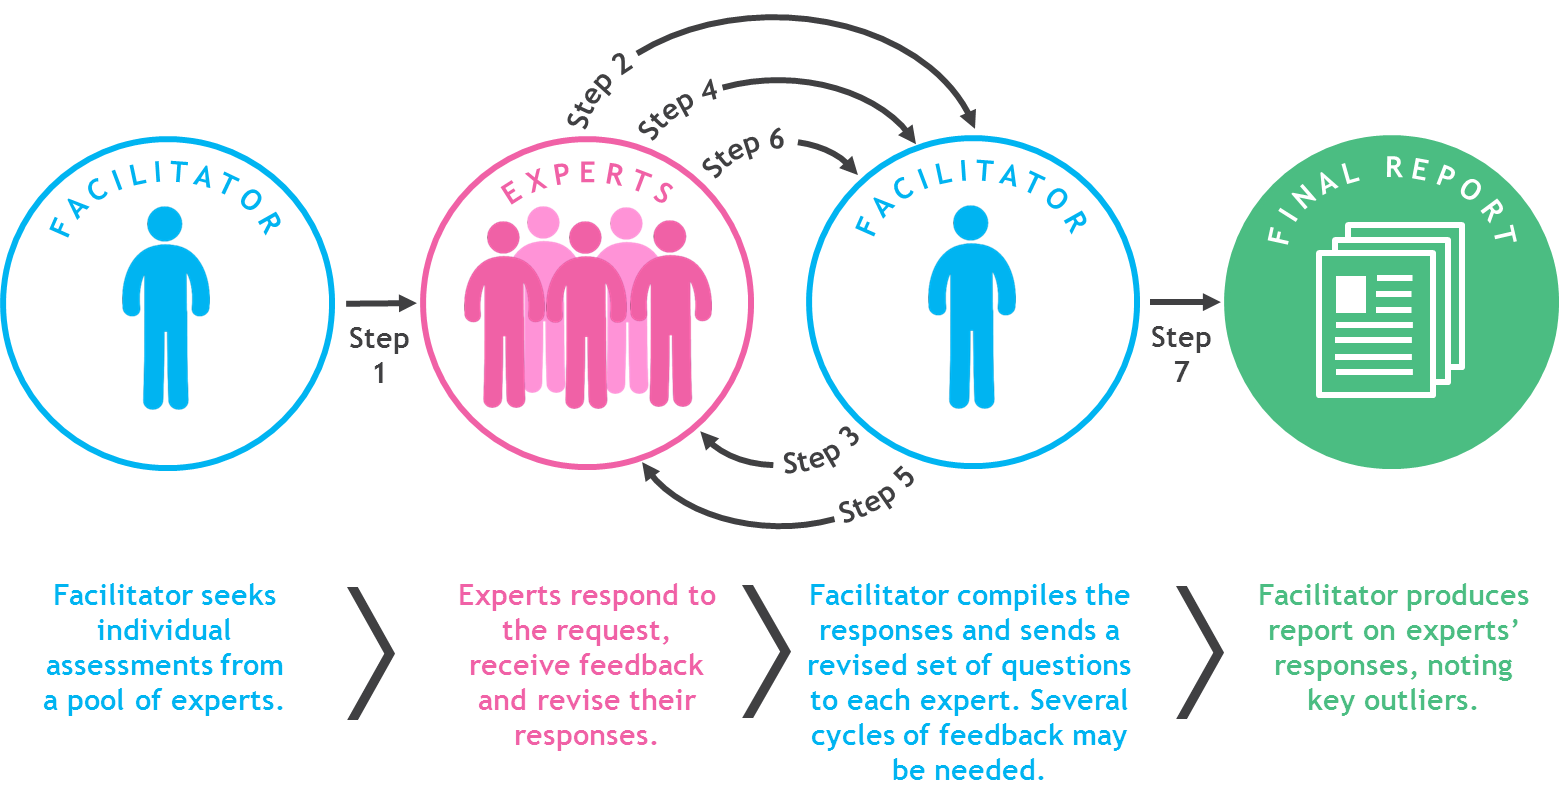

In [1]:
import matplotlib as mpl
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as optimize
from matplotlib.pyplot import figure

# Input
  
|  Variable | Meaning |
|---|---|
| `K` | the weight factor of experts' confidence indicators |
|  `R` | the marginal level of consistency |
|  `xi` | confidence interval radius | 
| `s` | levels of corresponding variable |

$K$, $R$, $x_i$ are chosen empirically.
    
Data is inputed as a table, where each row represents evaluation of single expert and each column represents $\mu_{nps}$ and $v_{nps}$ of each level.  
  
$\mu_{nps}$ - the expert's estimate that the criterion will take the value from the corresponding level $s=1,7$ ($0 \leq \mu_{nps} \leq 1$);  
$v_{nps}$ - the degree of confidence of the expert in each answer given ($0 \leq v_{nps} \leq 1$).
  
Example of the table format (for single specific product):

<table>
  <tr>
    <td rowspan = 3><b>Expert</b></td>
    <td colspan=14><b>Effectivity</b></td>
  </tr>
  <tr>
    <td colspan=2>Extremely Unefficient</td>
    <td colspan=2>Very Unefficient</td> 
    <td colspan=2>Unefficient</td>
    <td colspan=2>Averagly Efficient</td>  
    <td colspan=2>Efficient</td>
    <td colspan=2>Very Efficient</td>
    <td colspan=2>Extremly Efficient</td>
  </tr>
  <tr>
    <td> $\mu_{k1}$
    <td> $v_{k1}$  
    <td> $\mu_{k2}$
    <td> $v_{k2}$
    <td> $\mu_{k3}$
    <td> $v_{k3}$  
    <td> $\mu_{k4}$
    <td> $v_{k4}$
    <td> $\mu_{k5}$
    <td> $v_{k5}$
    <td> $\mu_{k6}$
    <td> $v_{k6}$  
    <td> $\mu_{k7}$
    <td> $v_{k7}$        
  </tr>
  <tr> 
    <td>Expert 1 
    <td>0,55 
    <td>1,00 
    <td>0,75 
    <td>0,70 
    <td>0,40 
    <td>1,00 
    <td>0,30 
    <td>1,00 
    <td>0,20 
    <td>1,00 
    <td>0,15 
    <td>1,00 
    <td>0,05 
    <td>1,00 
    </tr>
      <tr> 
    <td>Expert 2 
        <td>0,70 
        <td>0,90 
        <td>0,85 
        <td>1,00 
        <td>0,80 
        <td>0,90 
        <td>0,95 
        <td>0,80 
        <td>0,70 
        <td>0,90 
        <td>0,60 
        <td>1,00 
        <td>0,50 
        <td>0,80 
    </tr>
</table>

In [2]:
import matplotlib as mpl
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as optimize
from matplotlib.pyplot import figure

In [3]:
K = 0.8
S = 0.65
R = 0.3
xi = [0.70, 0.95, 0.93, 0.89, 0.77, 0.79, 0.91, 0.33, 0.93, 0.71, 0.92, 0.91, 0.43, 0.83, 0.95, 0.73]
s = ['Extremely Low', 'Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extremely High'] 
file = 'Broneavto_Modern'

*input data*

In [4]:
def input(path):
    path += '.txt'
    DATA_FILEX1 = Path('Data') / path
    with open(DATA_FILEX1, "r") as file:
        X1 = []
        row = file.readlines()
        for i in row :
            t = i.split()
            temp = []
            for j in t:
                temp.append(float(j))
            X1.append(temp)

    X1 = np.array(X1)
    return X1

In [5]:
X0 = input(file)

Read $\mu$

In [6]:
def m(a):
    t = int(np.size(a) / np.size(a[0]))
    k = int(np.size(a[0]) / 2)
    b = np.zeros((t, k))
    for i in range(k):
        b[:, i] = a[:, int(i)]
    return b

Read $v$

In [7]:
def v(a):
    t = int(np.size(a) / np.size(a[0]))
    k = int(np.size(a[0]) / 2)
    b = np.zeros((t, k))
    for i in range(k):
        b[:, i] = a[:, int(2 * i)]
    return b

*store $\mu$ and $v$ in variables*

In [8]:
v0 = v(X0)
m0 = m(X0)

*number of experts*

In [9]:
experts = int(np.size(v0) / np.size(v0[0]))

# Delphi method

`xs` is Miller scale (each value corresponds to level $s$).

In [10]:
import matplotlib as mpl
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as optimize
from matplotlib.pyplot import figure

In [11]:
xs = [0, 0.07, 0.21, 0.36, 0.5, 0.64, 0.79, 0.93]

## Lower and upper interval estimates

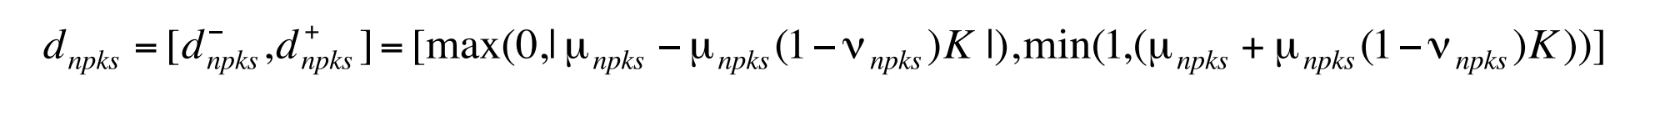

In [12]:
def d_niz(i, j):
    return (max(0, m0[i][j] - m0[i][j] * (1 - v0[i][j]) * K))

def d_verh(i, j):
    return (min(1, m0[i][j] + m0[i][j] * (1 - v0[i][j]) * K))

d_niz0 = []
d_verh0 = []
for i in range(experts):
    d_niz0.append([])
    d_verh0.append([])
    for j in range (np.size(v0[0])):
        d_niz0[i].append(d_niz(i, j))
        d_verh0[i].append(d_verh(i, j))
d_niz0 = np.array(d_niz0)
d_verh0 = np.array(d_verh0)

## Quality functional calculations

### Mean estimates
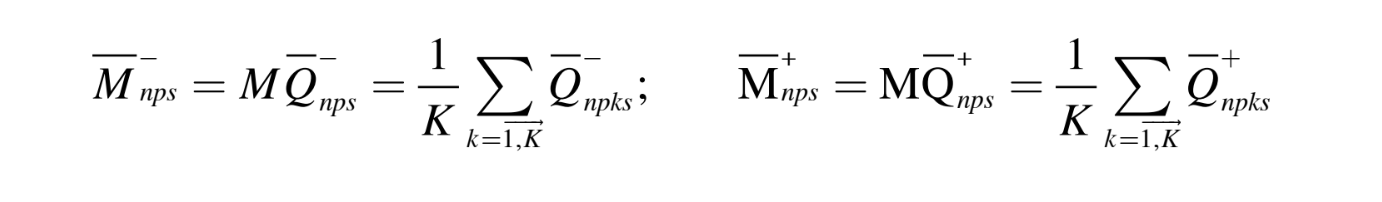

In [13]:
aver_niz0 = []
aver_verh0 = []

def aver(list):
    return np.sum(list) / np.size(list)

for i in range(np.size(v0[0])):
    aver_niz0.append(aver(d_niz0[:,i]))
    aver_verh0.append(aver(d_verh0[:,i]))
    
aver_niz0 = np.array(aver_niz0)
aver_verh0 = np.array(aver_verh0)

### Interval estimates 
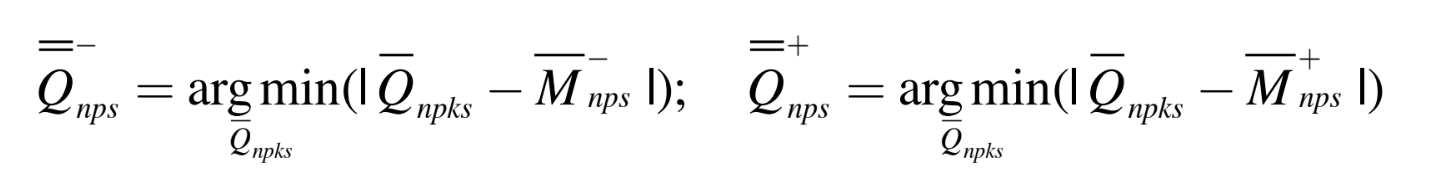
Interval estimate is mean adjusted for real expert estimates, based on which we will build discreted interval Gaussian density.

In [14]:
inter_integ_niz0 = []
inter_integ_verh0 = []

for i in range(7):
    inter_integ_niz0.append(d_niz0[np.argmin(d_niz0[:,i] - aver_niz0[i])][i])
    inter_integ_verh0.append(d_verh0[np.argmin(d_verh0[:,i] - aver_verh0[i])][i])
    
inter_integ_niz0 = np.array(inter_integ_niz0)
inter_integ_verh0 = np.array(inter_integ_verh0)

### Interval Gaussian density calculation
#### Coefficient of normalization of the built integral expert evaluation
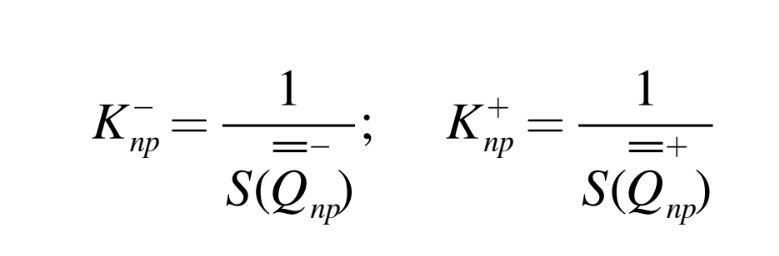

In [15]:
sum = 0
for i in range(7):
    sum += (xs[i + 1] - xs[i]) * inter_integ_niz0[i] / 2
k_gaus_niz0 = 1 / (sum)

sum = 0
for i in range(7):
    sum += (xs[i + 1] - xs[i]) * inter_integ_verh0[i] / 2
k_gaus_verh0 = 1 / sum

#### Interval Gaussian density
The sampled Gaussian interval density must be constructed in such a way that the distance from it to the integral expert evaluation is minimal.
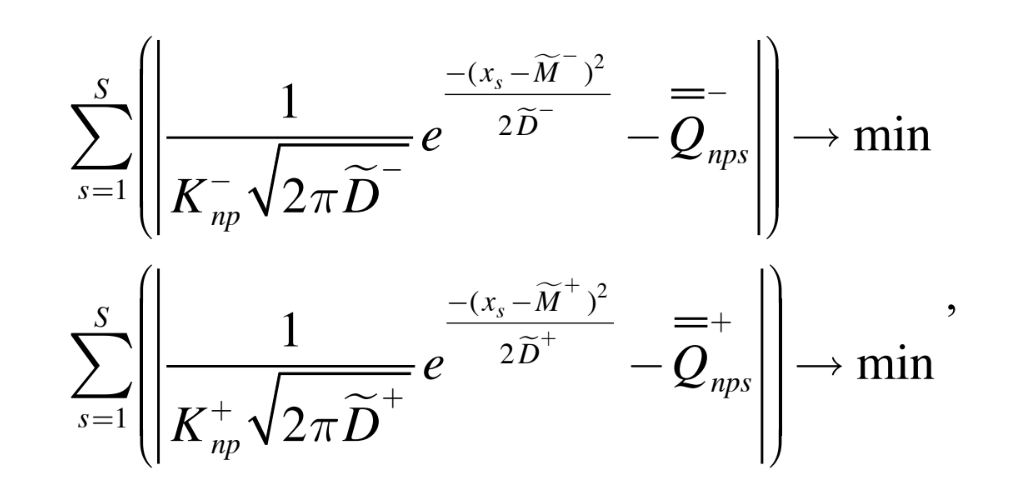
Which is:
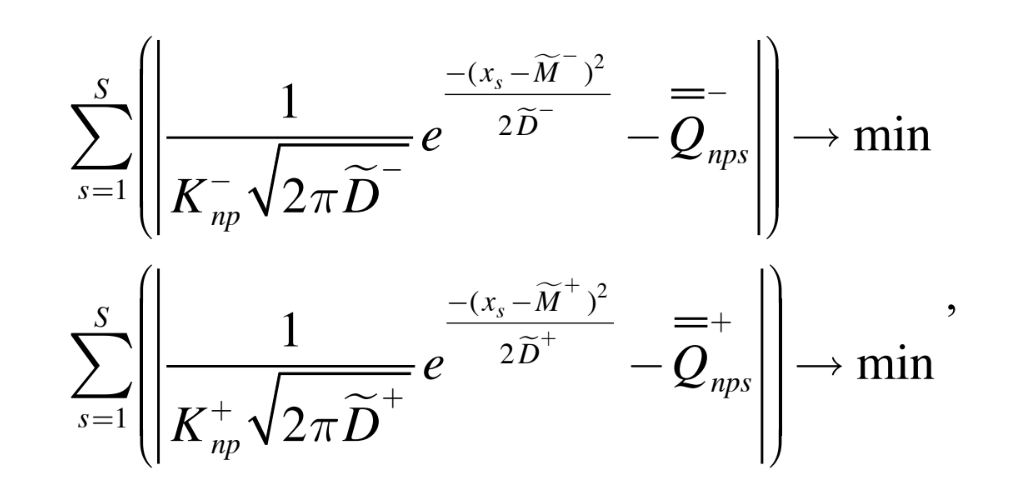
or
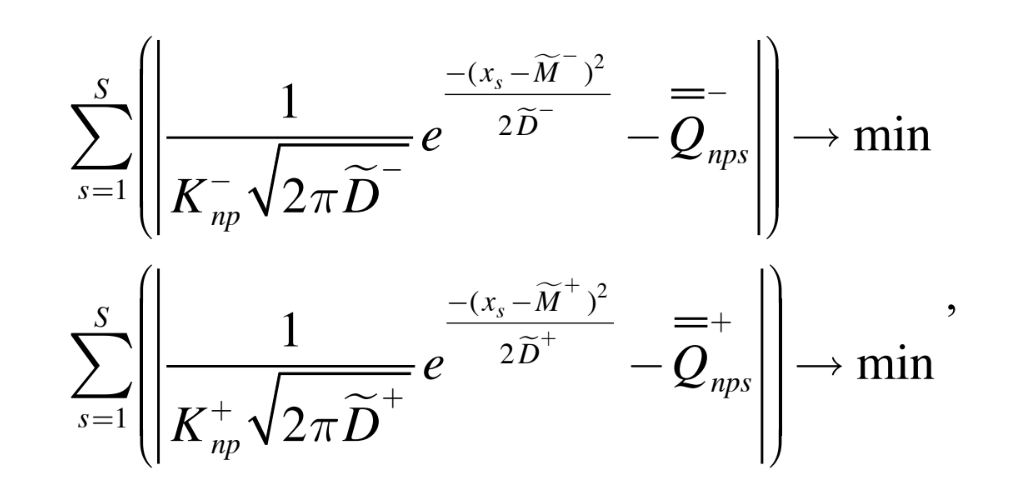

In [16]:
def f1(params):
    M, D = params
    sum = 0
    for i in range(7):
        sum += abs(1 / (k_gaus_niz0 * math.sqrt(2 * math.pi * D)) 
                   * math.exp( -(xs[i + 1] - M) ** 2 / 2 / D ) 
                   - inter_integ_niz0[i])
    return sum

initial_guess = [0, 1]
result = optimize.minimize(f1, initial_guess, bounds=((-10, 10),(0.0000001, 10)))
gaus_params_niz = result.x

def f2(params):
    M, D = params
    sum = 0
    for i in range(7):
        sum += abs(1 / (k_gaus_verh0 * math.sqrt(2 * math.pi * D)) 
                   * math.exp( -(xs[i + 1] - M) ** 2 / 2 / D ) 
                   - inter_integ_verh0[i])
    return sum

initial_guess = [0, 1]
result = optimize.minimize(f2, initial_guess, bounds=((-10, 10),(0.0000001, 10)))
gaus_params_verh = result.x

gauss_niz0 = []
gauss_verh0 = [] 

def gauss_niz(i, params):
    M, D = params
    return 1 / (k_gaus_niz0 * math.sqrt(2 * math.pi * D)) * math.exp( -(xs[i + 1] - M) ** 2 / 2 / D ) 

def gauss_verh(i, params):
    M, D = params
    return 1 / (k_gaus_verh0 * math.sqrt(2 * math.pi * D)) * math.exp( -(xs[i + 1] - M) ** 2 / 2 / D ) 

for i in range(7):
    gauss_niz0.append(gauss_niz(i, gaus_params_niz))
    gauss_verh0.append(gauss_verh(i, gaus_params_verh))

## Quality functional
Based on the above calculations, we obtain quality functionalities for each expert, taking into account the competence according to the following formula:
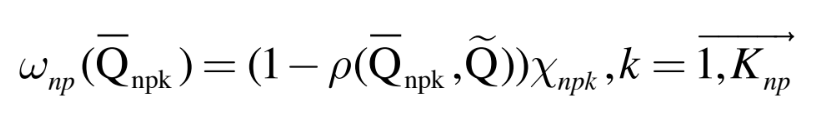

where the distance between the constructed Gaussian interval density and each expert estimate is calculated as:
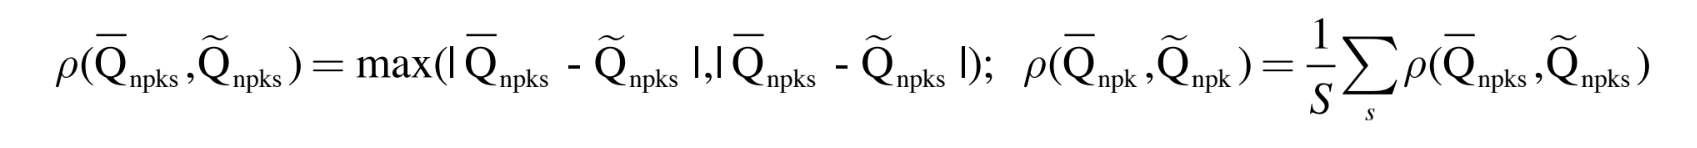

In [19]:
def func_qual(j):
    sum = 0
    for i in range(7):
        sum += max(m0[j][i] - gauss_niz0[i], m0[j][i] - gauss_verh0[i])
    return (1 - sum / 7) * xi[i]

quality = []

for j in range(experts):
    quality.append(func_qual(j))

## Median of the cluster
To calculate the median, we first construct a matrix of distances between interval estimates by metric
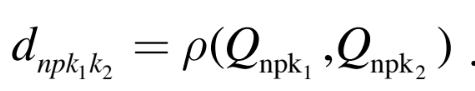

For each level, the distance is calculated as follows:
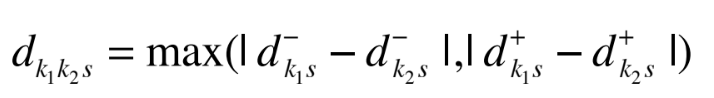

*in this solution we store distances in matrix (`rast`), where element of the matrix is distance betwen expert №(row number) and expert №(column number)*

In [29]:
def p(i, j):
    sum = 0
    for k in range(np.size(v0[0])):
        sum += m0[i][k] - m0[j][k]
    return abs(sum) / 7    
        
rast = np.zeros((experts, experts))

for i in range(experts):
    for j in range(experts):
        rast[i][j] = p(i, j)      

rast = np.around(rast, 2)

Calculate a vector, each coordinate of which is equal to the sum of all elements of the corresponding matrix row by the formula
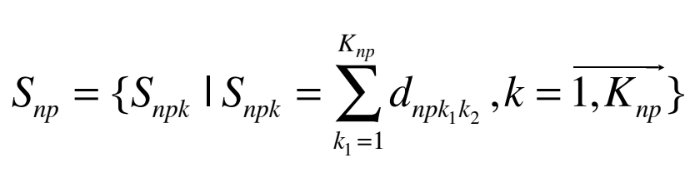

In [ ]:
sum_rast = []

for r in rast:
    sum_rast.append(np.sum(r))

## Building confidence interval
Calculate the confidence interval using the formula:
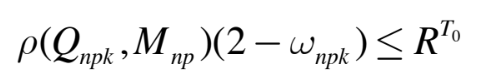

In [20]:
def p(j):
    sum = 0
    for i in range(7):
        sum += abs(m0[j][i] - m0[np.argmin(sum_rast)][np.argmax(v0[np.argmin(sum_rast)])])
    return sum / 7 

dov_int = []
for i in range (experts):
    dov_int.append(p(i) * (2 - quality[i]))
    
final_dov = []
for i in range(experts):
    if dov_int[i] < 0.5:
        final_dov.append(i + 1)

# Results

## Highest and lowest values of quality functional

In [ ]:
print('Worst value of quality functional has expert ' + str(np.argmin(quality) + 1) + '.')
print('Best value of quality functional has expert ' + str(np.argmax(quality) + 1) + '.')

##  Least distant from other estimate

Expert's opinion, which is the least distant from the estimates of other experts can be found as
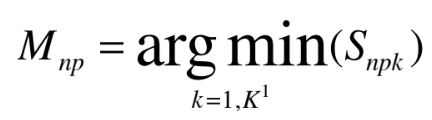

In [33]:
print('Least distant from other is estimate of ' + str(np.argmin(sum_rast) + 1) + ' expert.')

Least distant from other is estimate of 2 expert.


### Analysis of consistency of estimates in the cluster

The criterion for the completion of the examination procedure for the cluster is next: $S^T$ should exceed the a priori specified level of $S$, where $S^T=\frac{number\_of\_experts\_with\_estimates\_inside\_confidence\_interval}{total\_number\_of\_experts}$

In [41]:
print('Next experts are inside confidence interval: ' + str(final_dov))

Next experts are inside confidence interval: [2, 3, 4, 5, 6, 7, 9, 10, 12]


In [34]:
if np.size(final_dov) / experts > S:
    print ('Estimates are consistent!')
else:
    print ('Estimates are NOT consistent!')

Estimates are NOT consistent!


If estimates are consistent our examination process is completed. Otherwise, next round of questioning with revised questions should take place.

## Harmonized expert estimate
Harmonized expert estimate is the estimate chosen by the median expert, who chose the highest value of the estime among the $S$ levels with the highest level of confidence in the answer given:
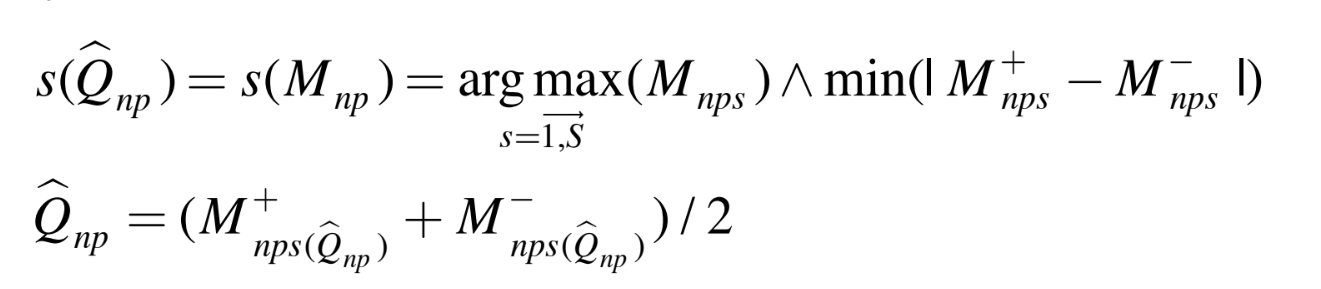

In [40]:
print('Median expert: ' + str(np.argmin(sum_rast) + 1))
print('Harmonized expert estimate: ' + str(m0[np.argmin(sum_rast)][np.argmax(v0[np.argmin(sum_rast)])]))

Median expert: 2
Harmonized expert estimate: 0.94


In [47]:
level = np.where(
           m0[np.argmin(sum_rast)] == 
           m0[np.argmin(sum_rast)][np.argmax(v0[np.argmin(sum_rast)])])[0][0]

print ('Predicted level: ' + s[level] + ' (' + str(level + 1) + ')')
print('On a Miller scale: ' + str(xs[level + 1]))

Predicted level: Very Low (2)
On a Miller scale: 0.21


# Plots

# Expert estimates

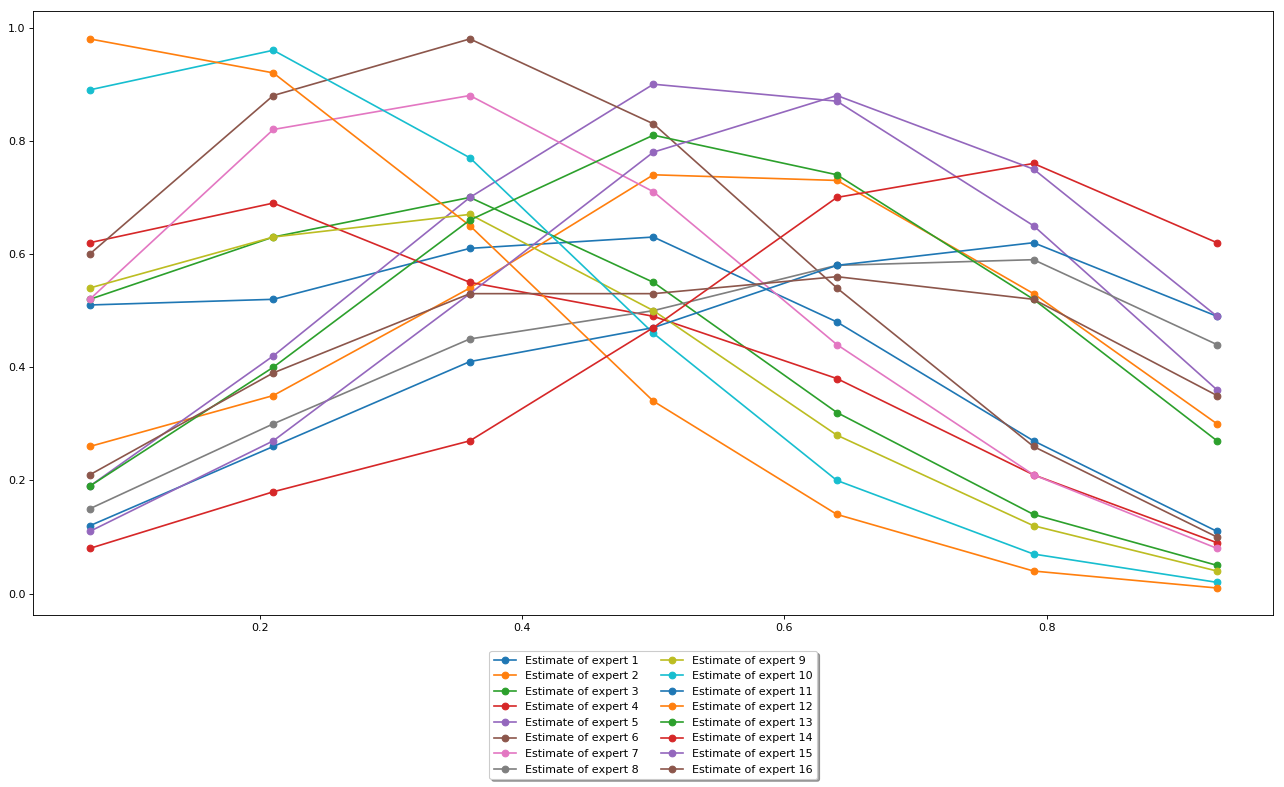

In [35]:
x = xs[1:len(xs)]
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
for i in range(experts):
    plt.plot(x, v0[i], '-o', label = 'Estimate of expert ' + str(i + 1))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

## Interval estimates

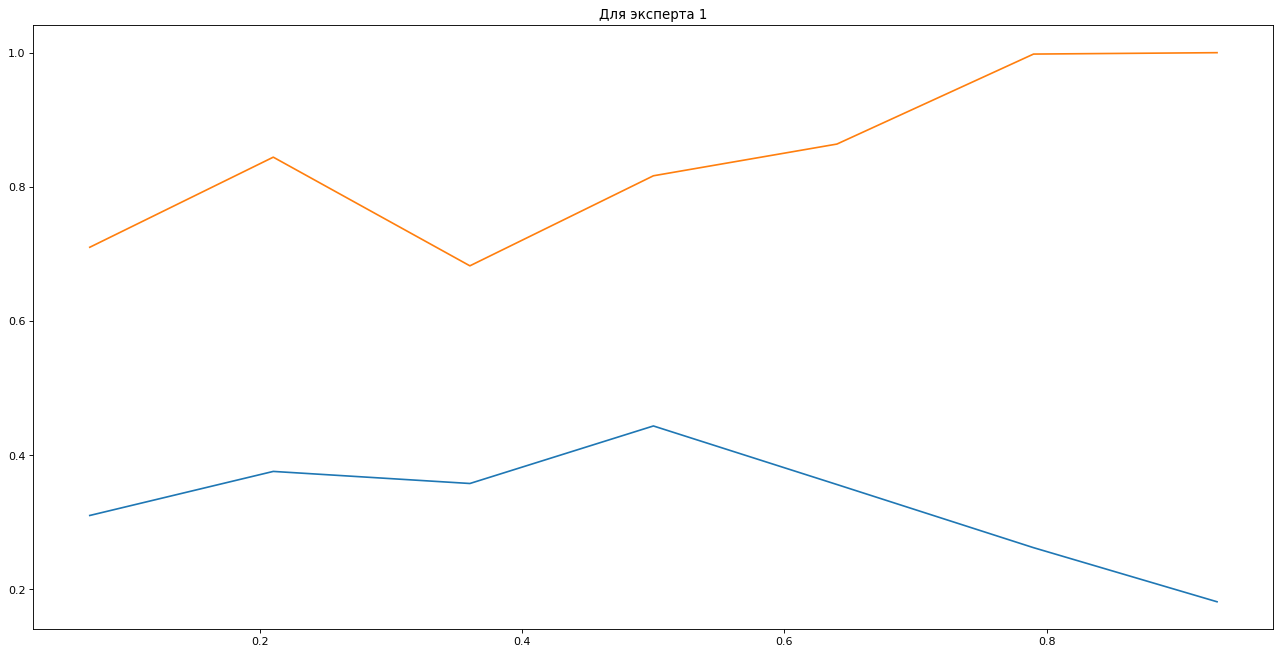

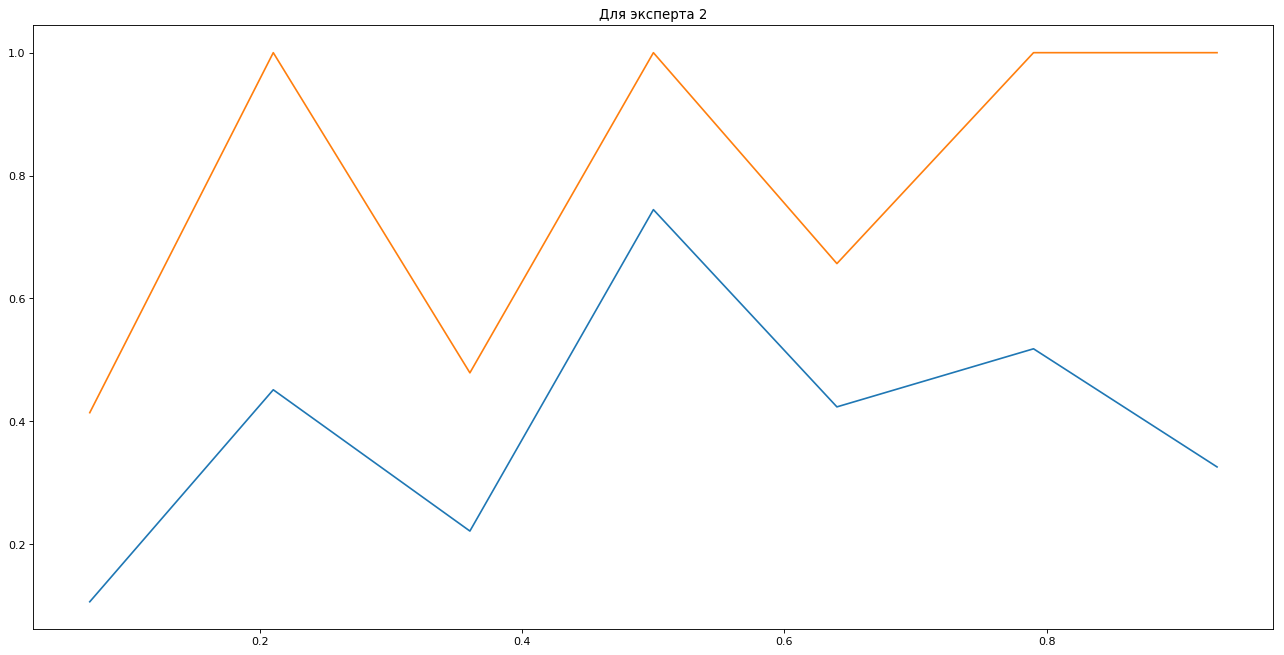

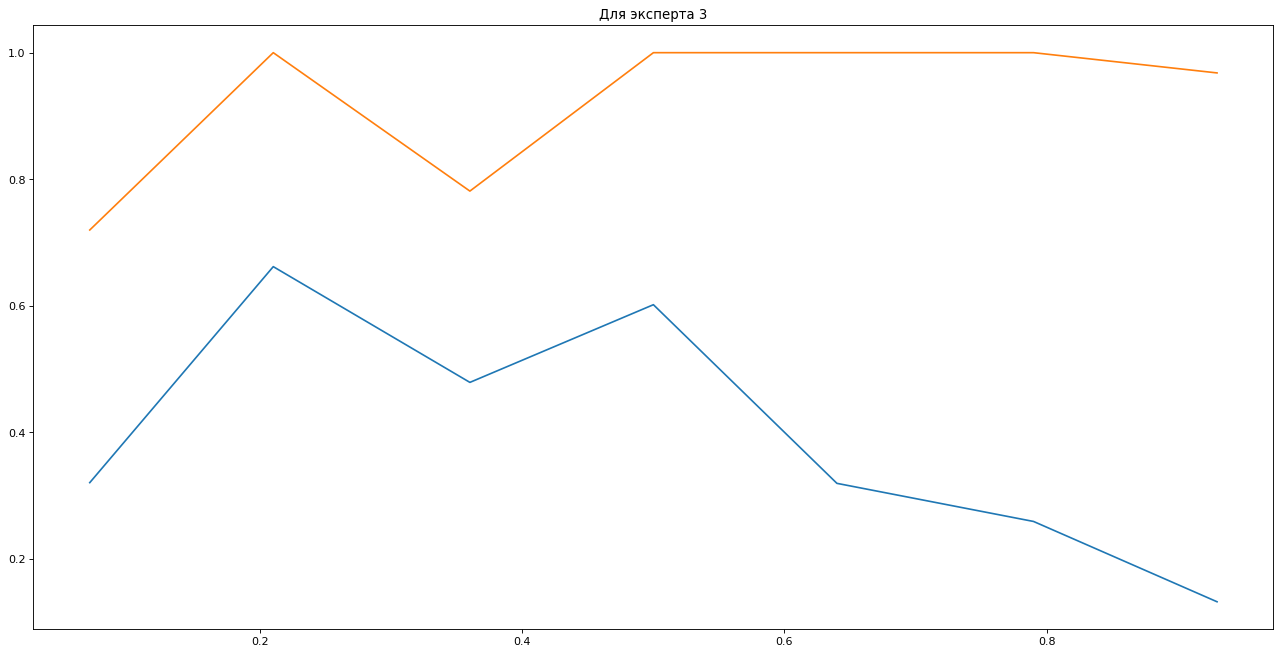

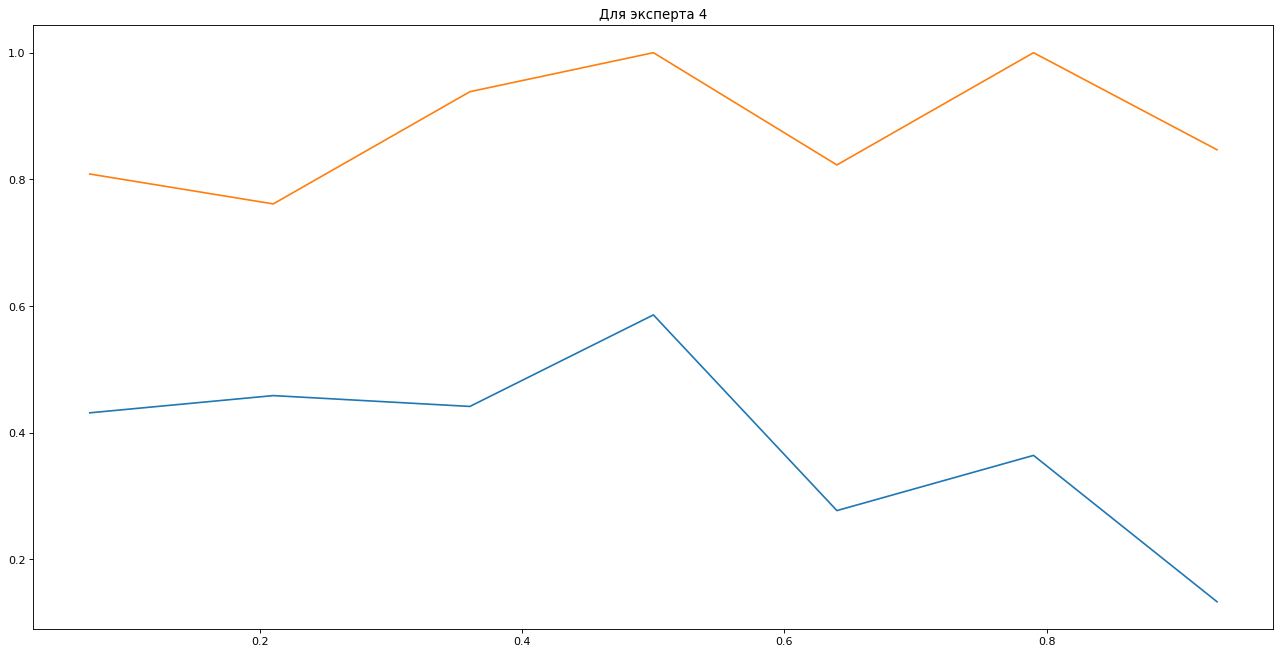

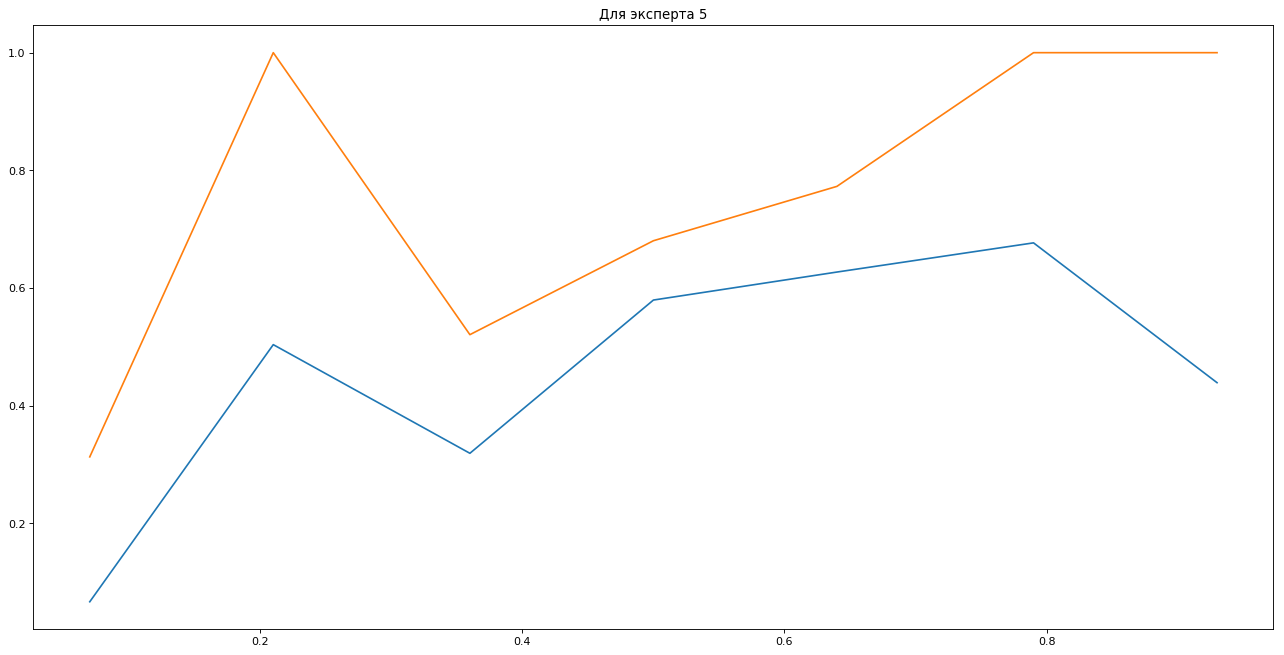

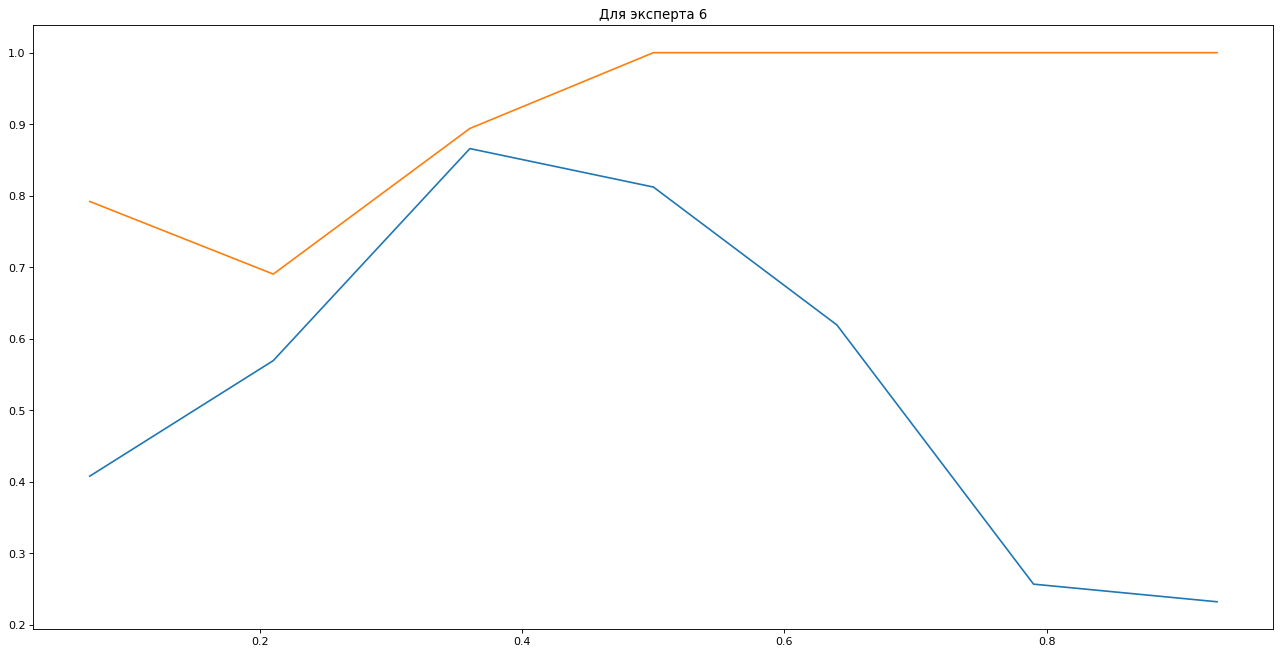

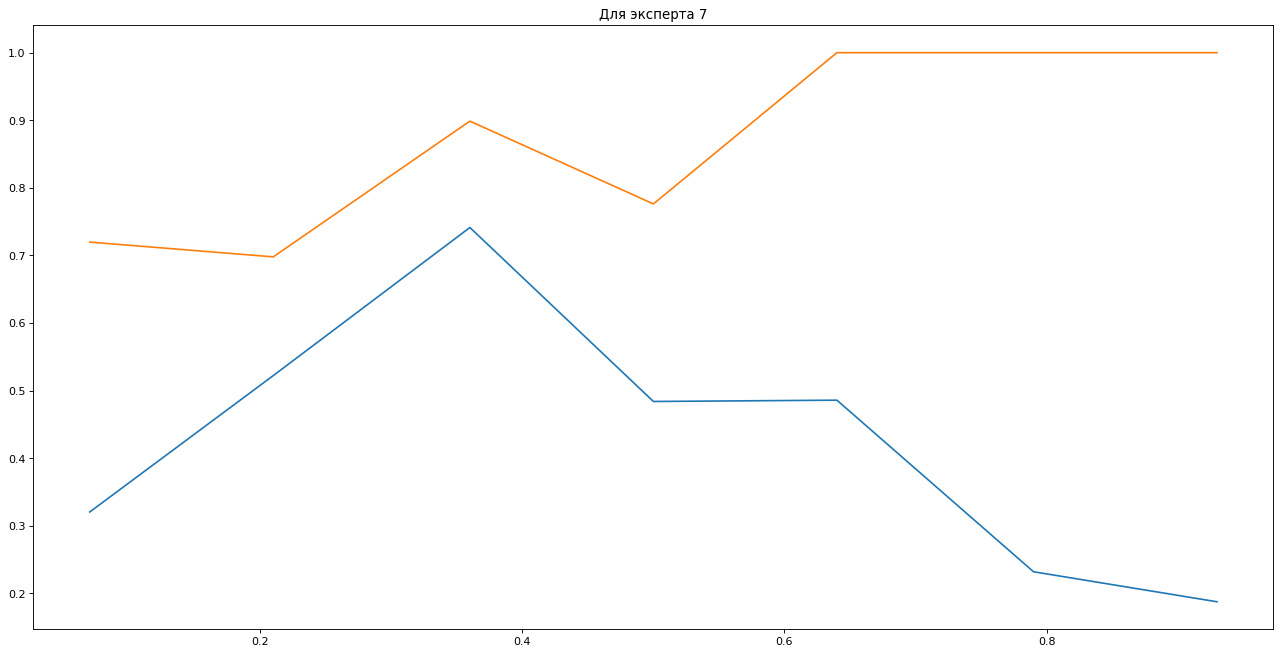

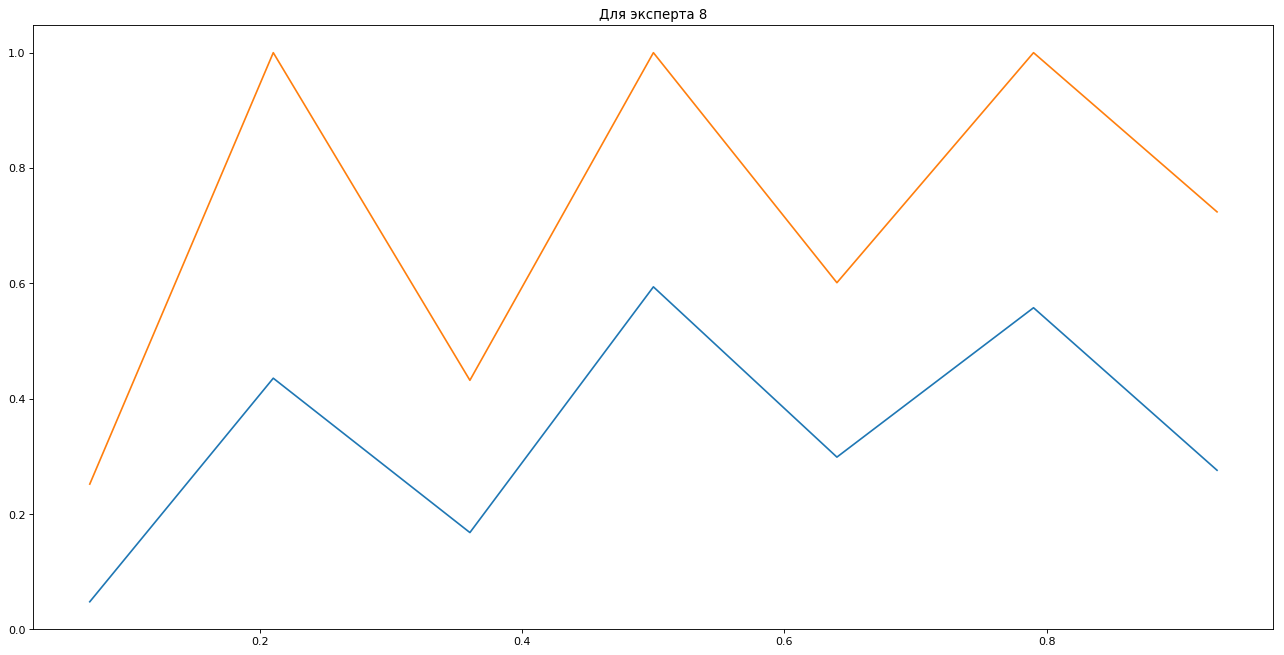

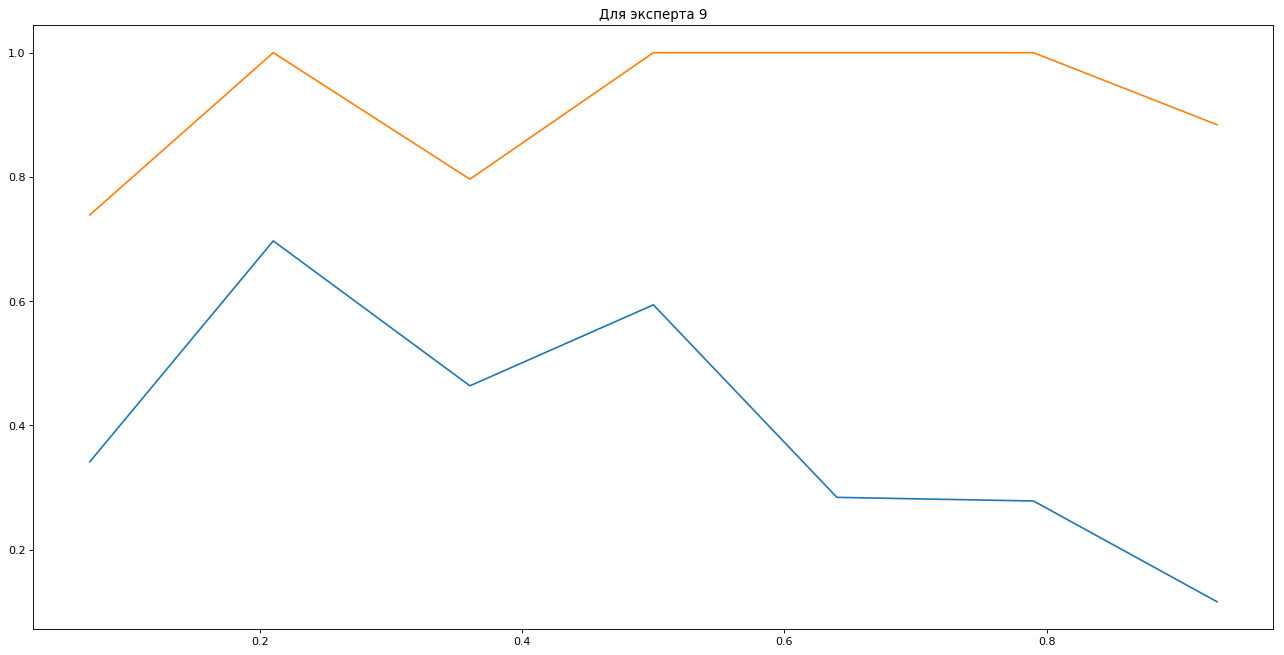

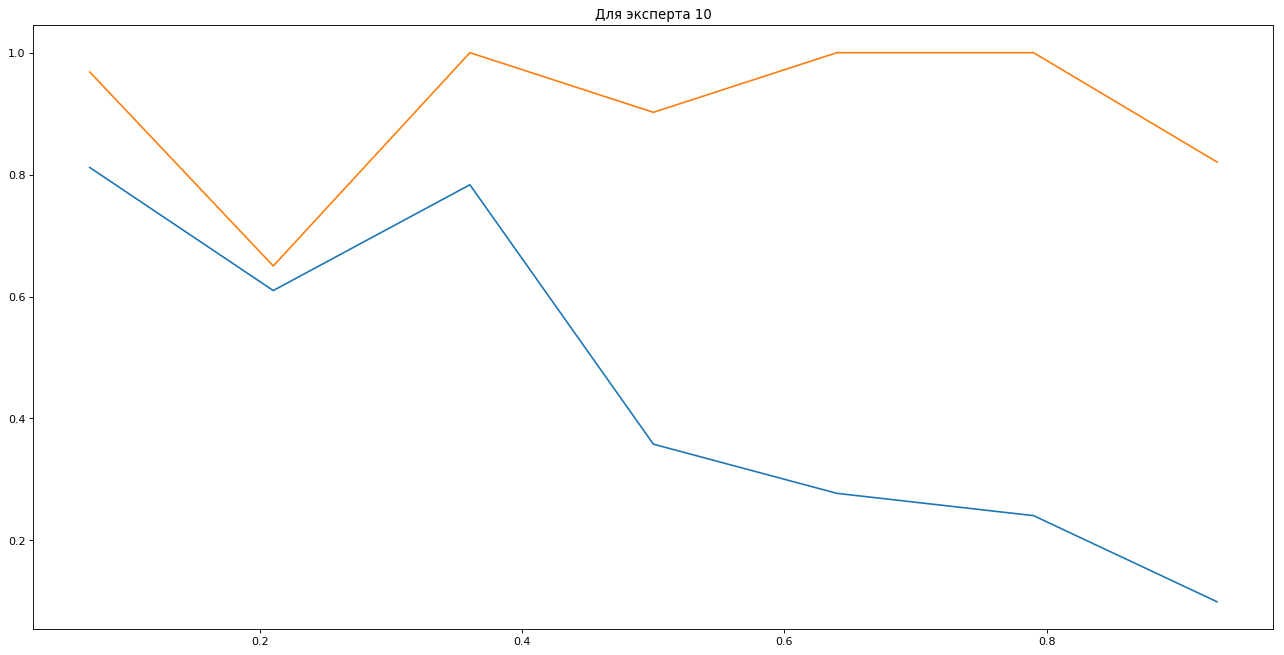

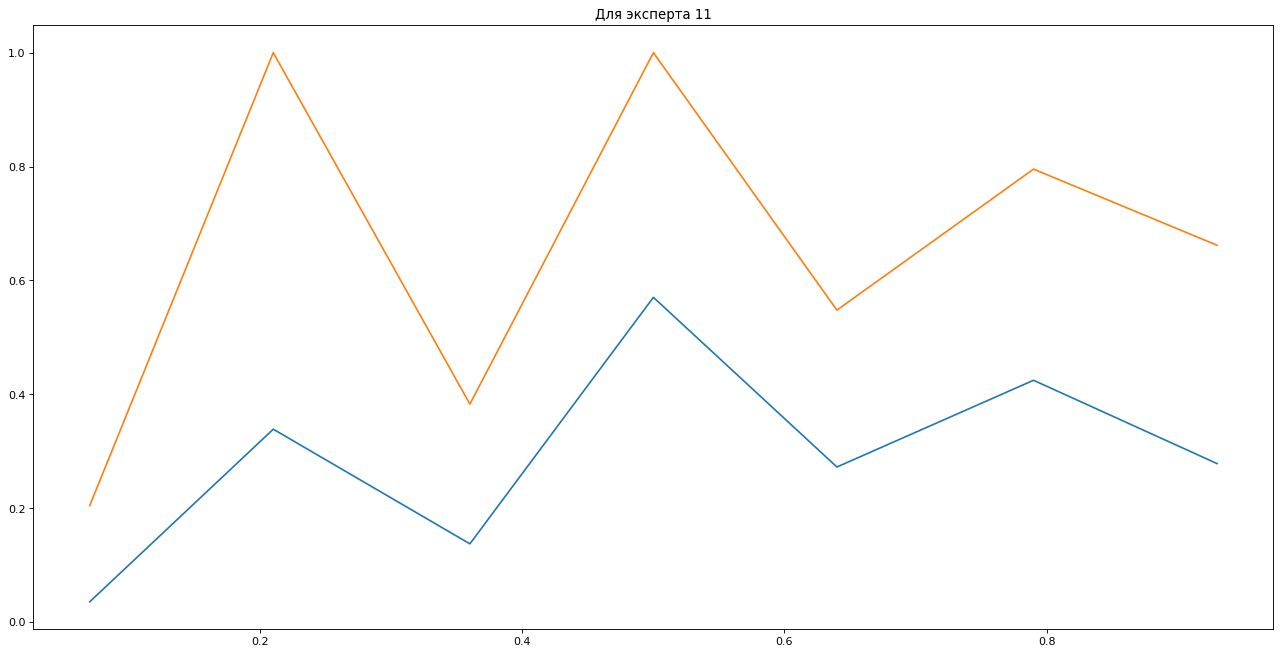

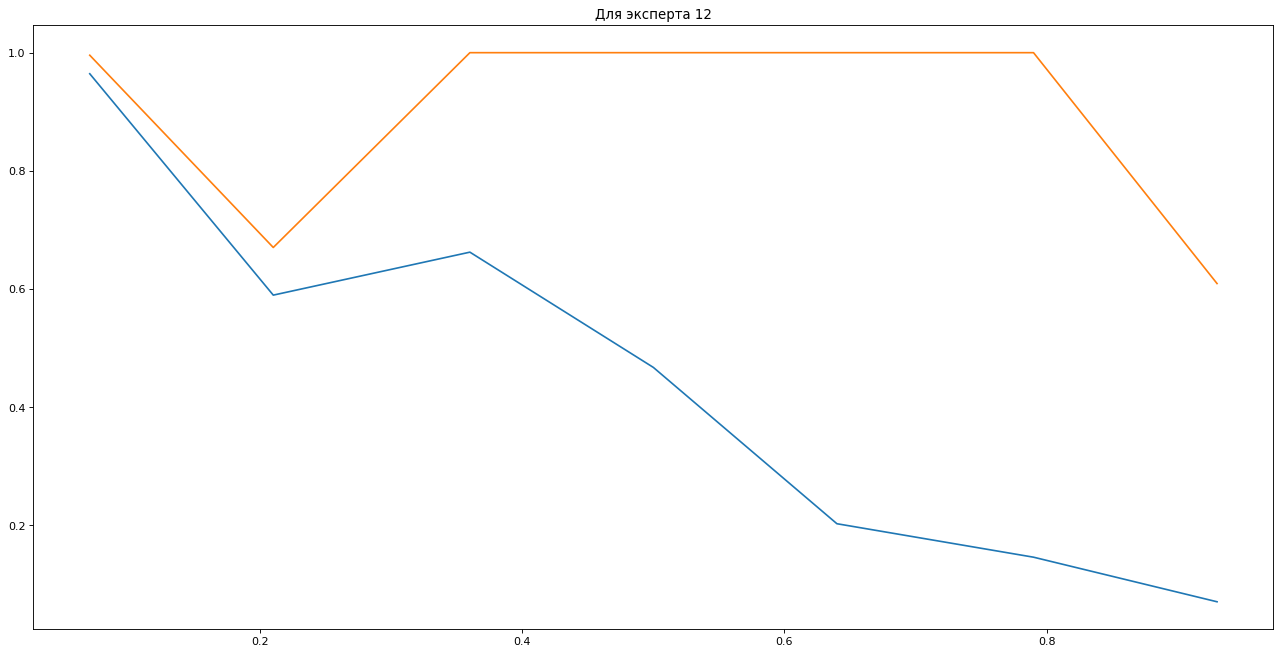

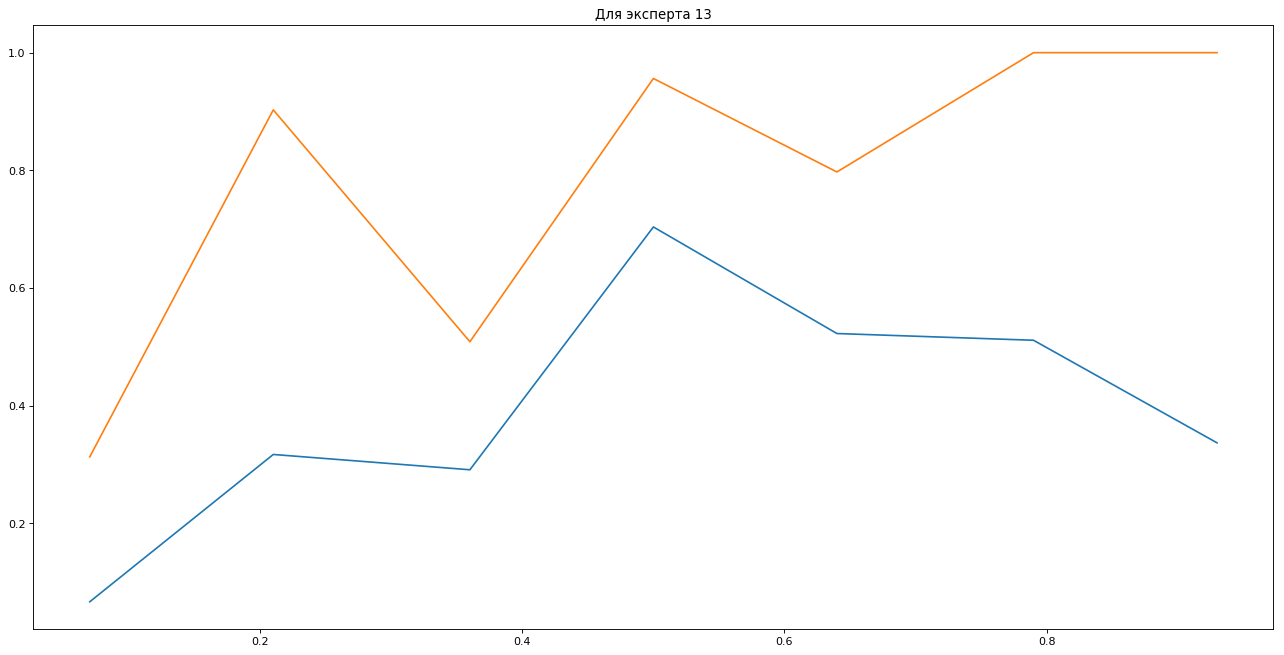

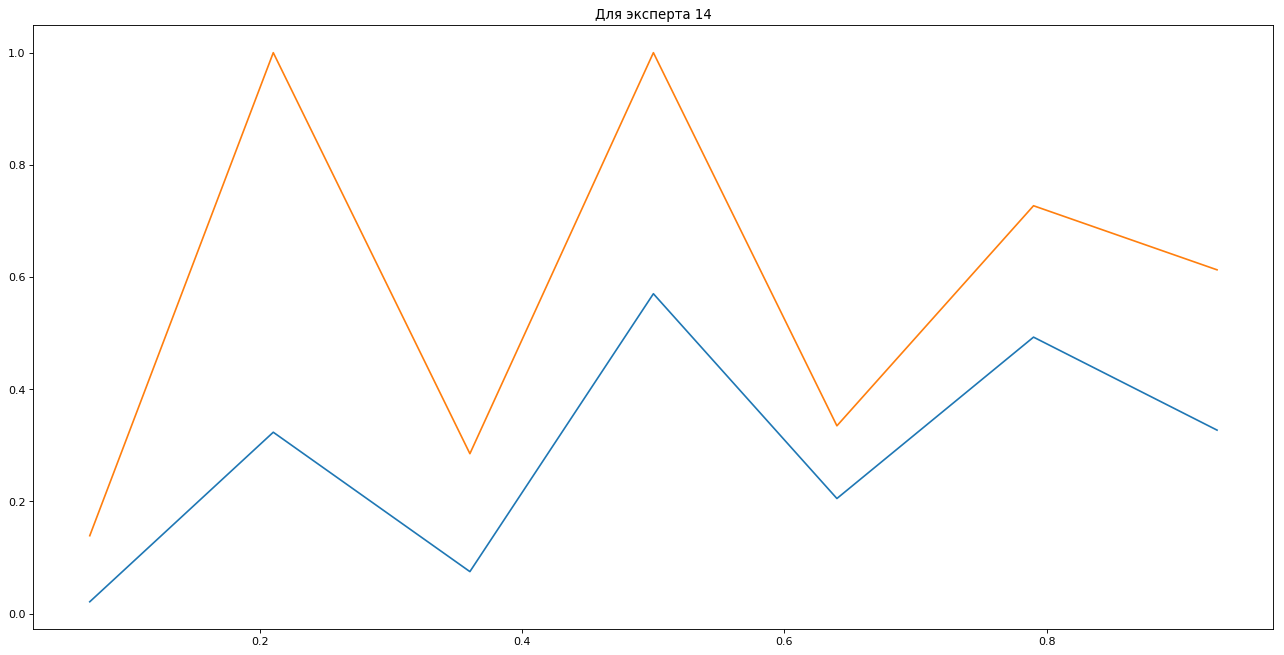

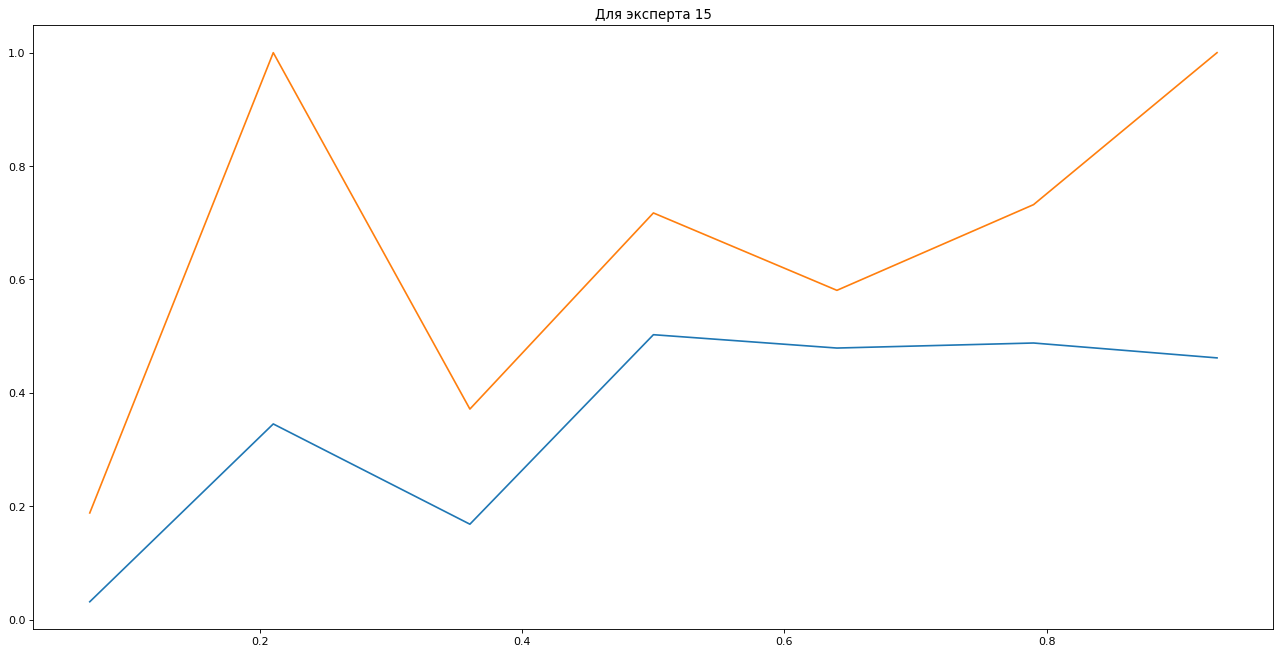

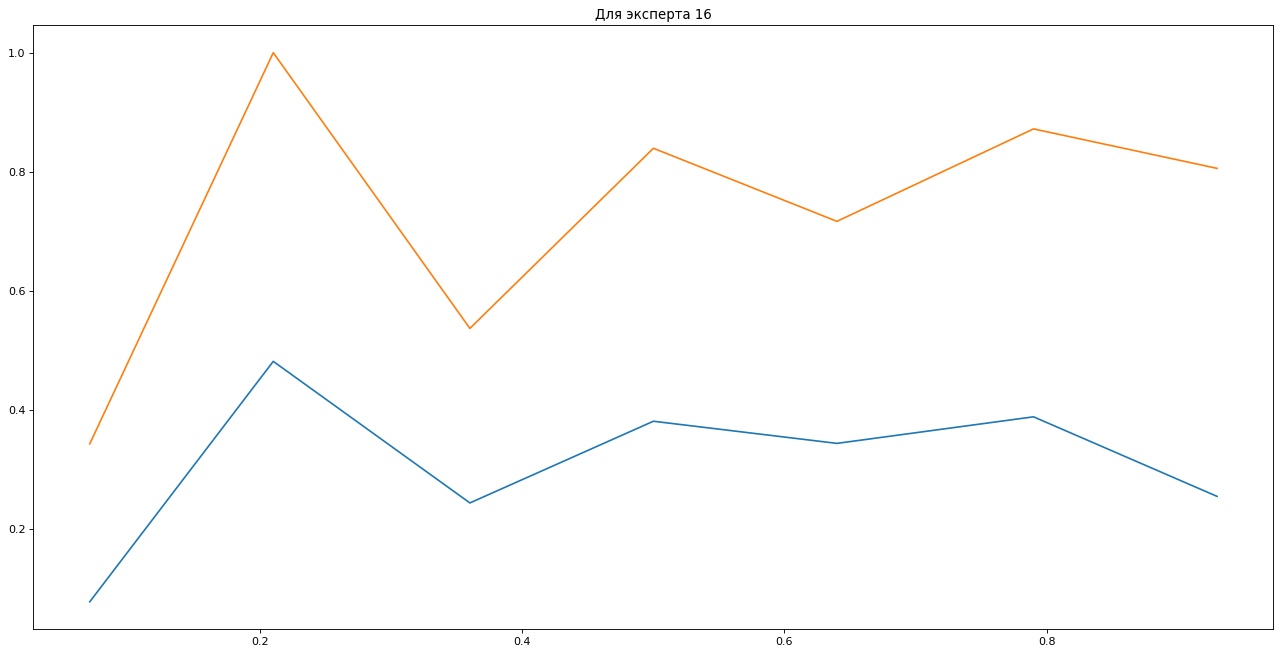

In [24]:
for i in range(experts):

    figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(x, d_niz0[i])
    plt.plot(x, d_verh0[i])
    plt.title('Expert '+ str(i + 1))

# Interval integral estimates

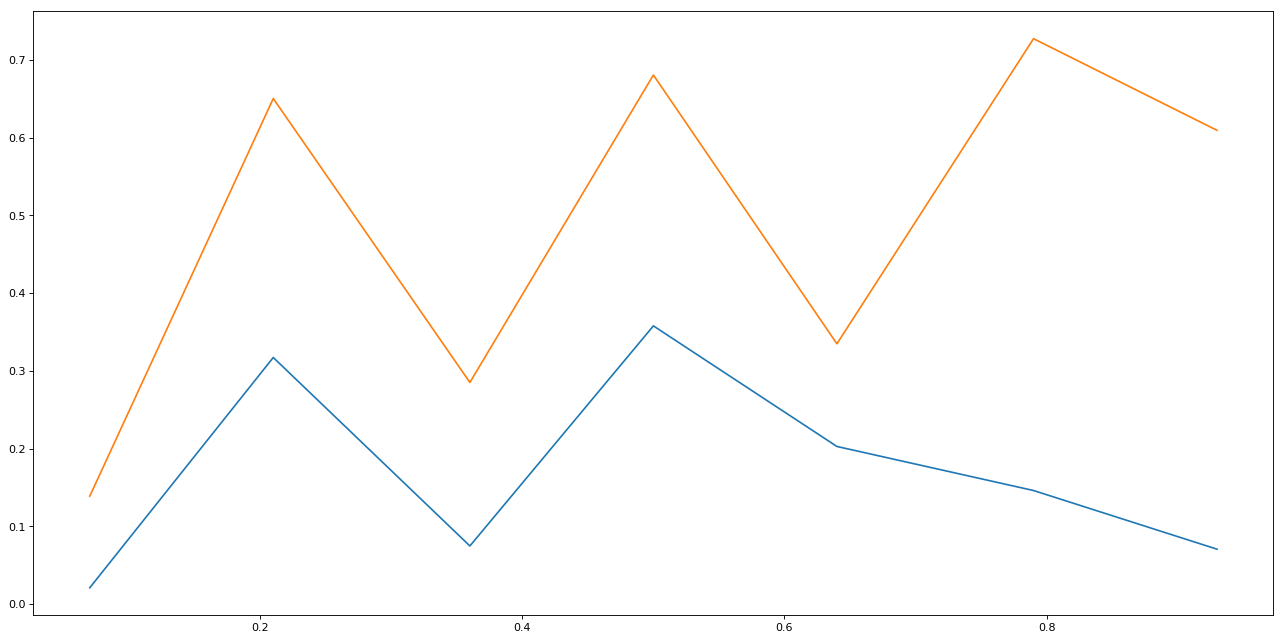

In [26]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x, inter_integ_niz0)
plt.plot(x, inter_integ_verh0)

## Average interval estimates

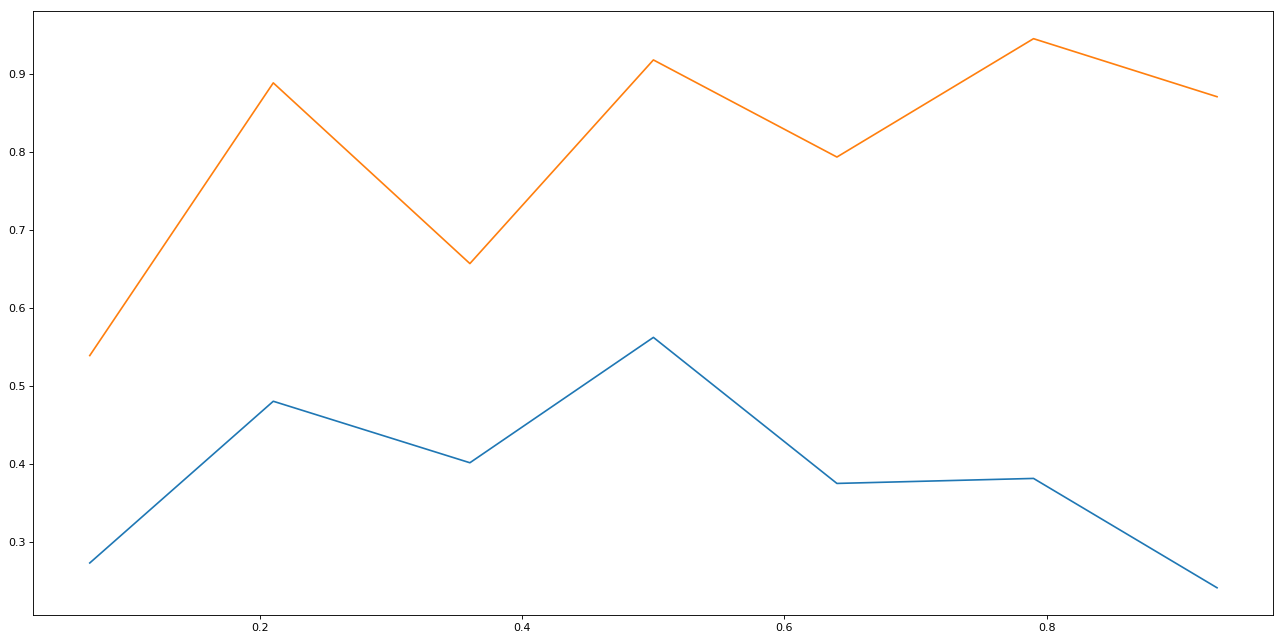

In [25]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x, aver_niz0)
plt.plot(x, aver_verh0)

## Gaussian estimates

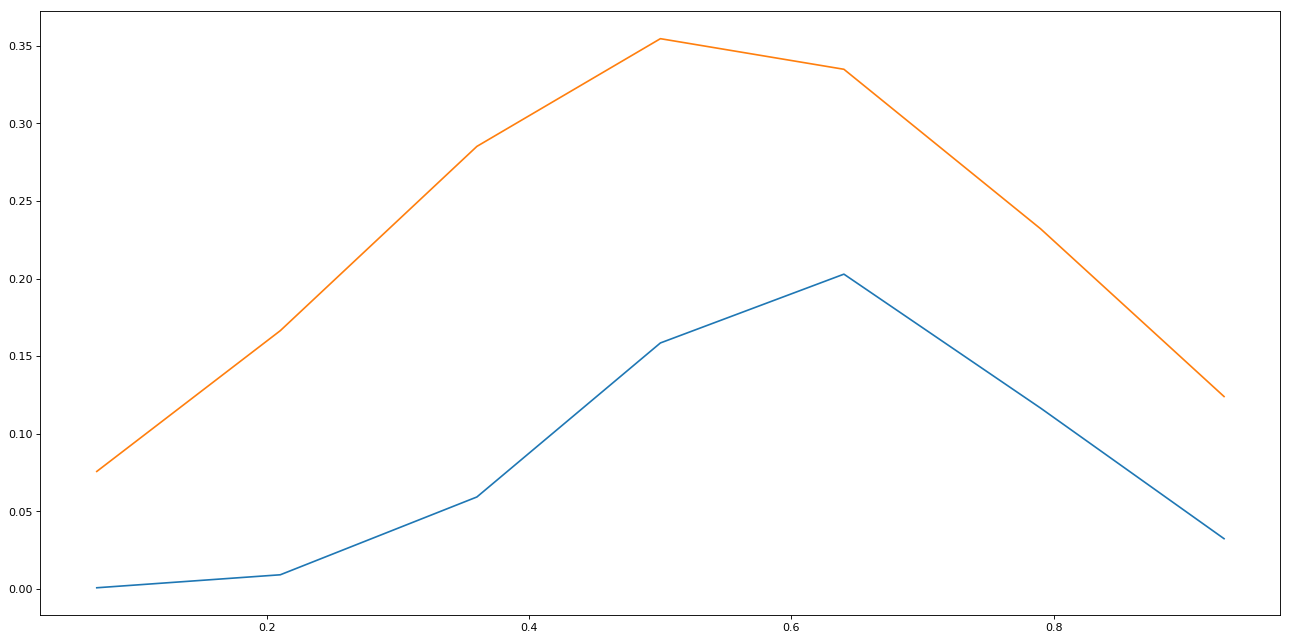

In [27]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x, gauss_niz0)
plt.plot(x, gauss_verh0)

## Merged plot of estimates

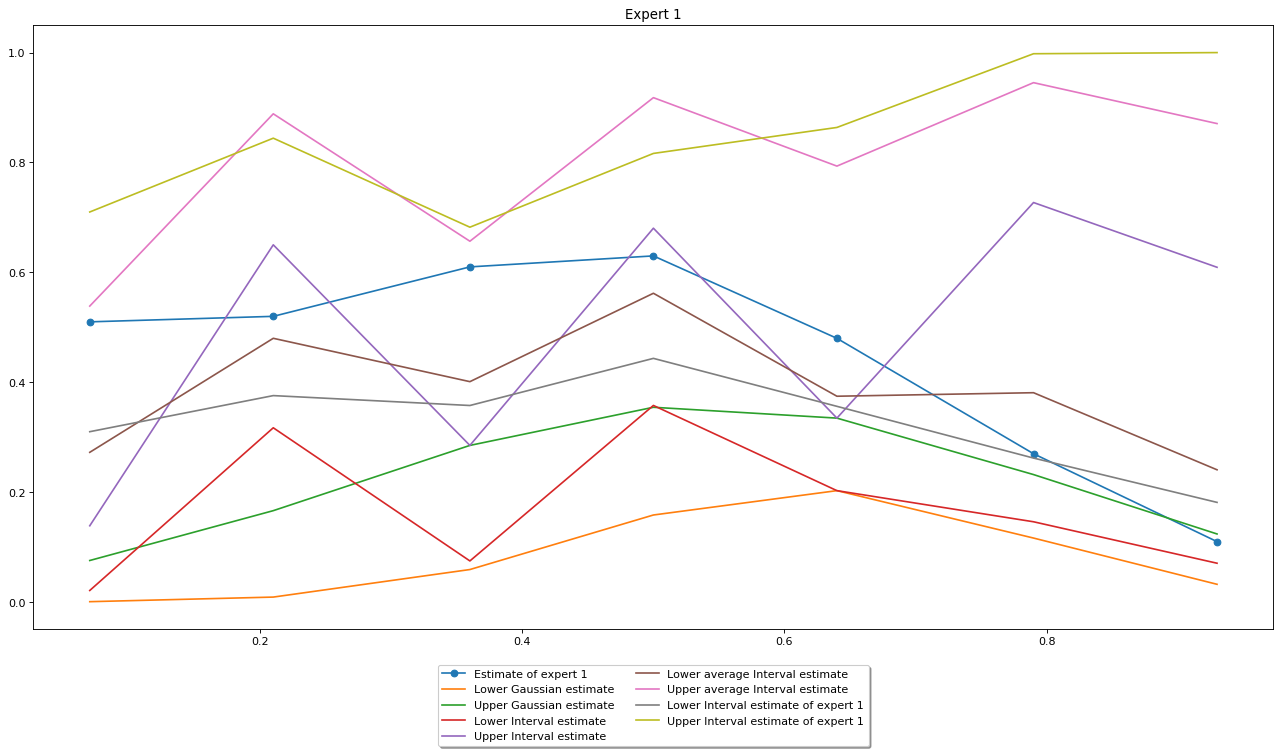

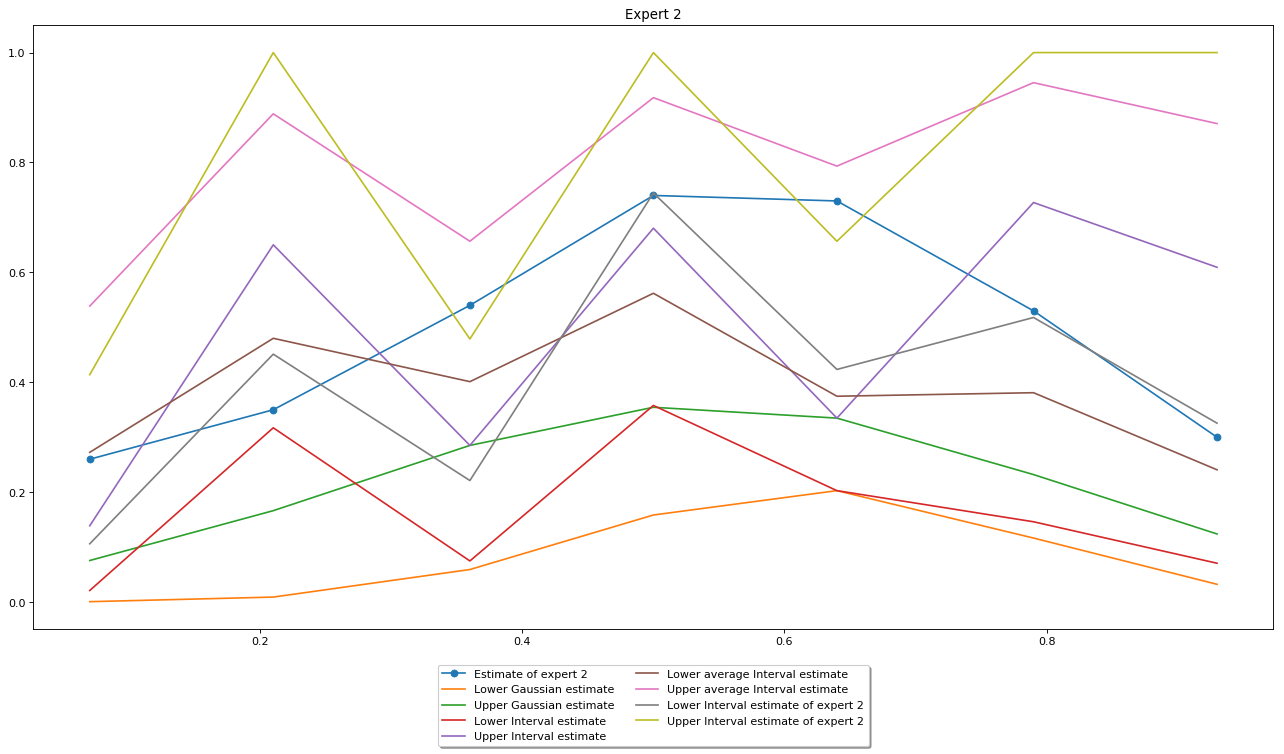

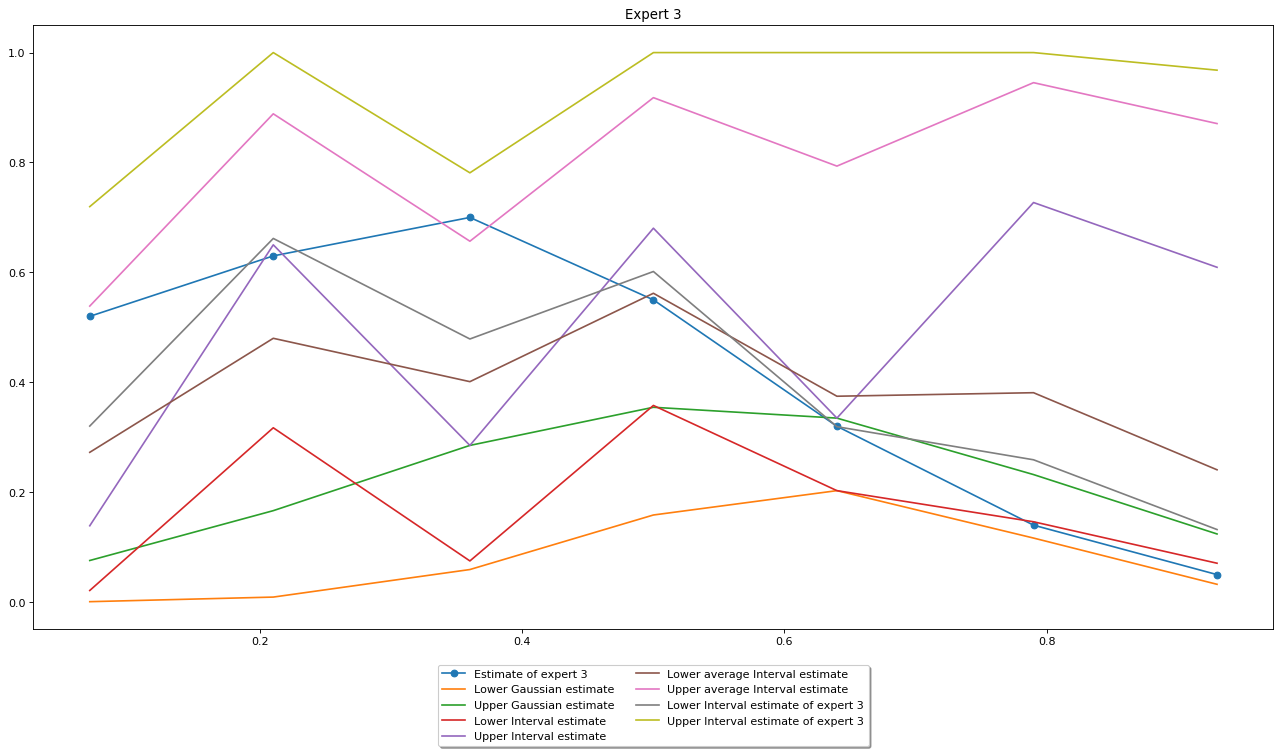

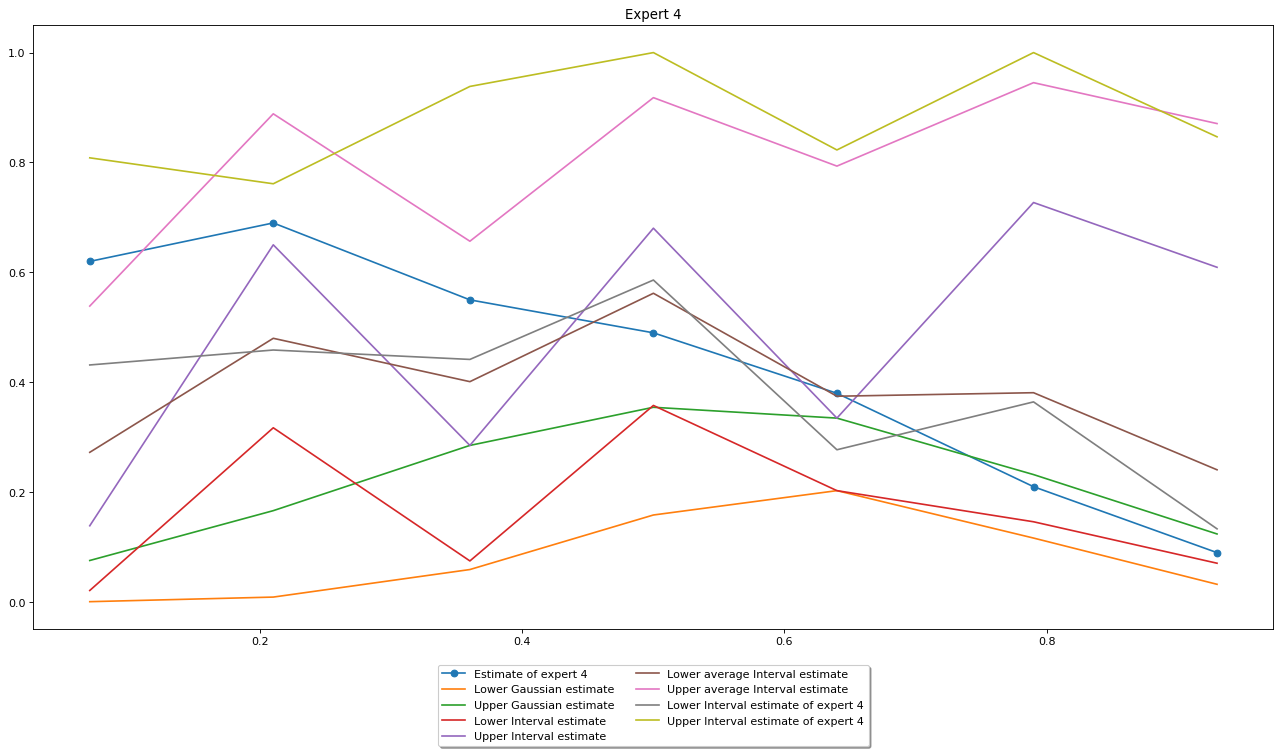

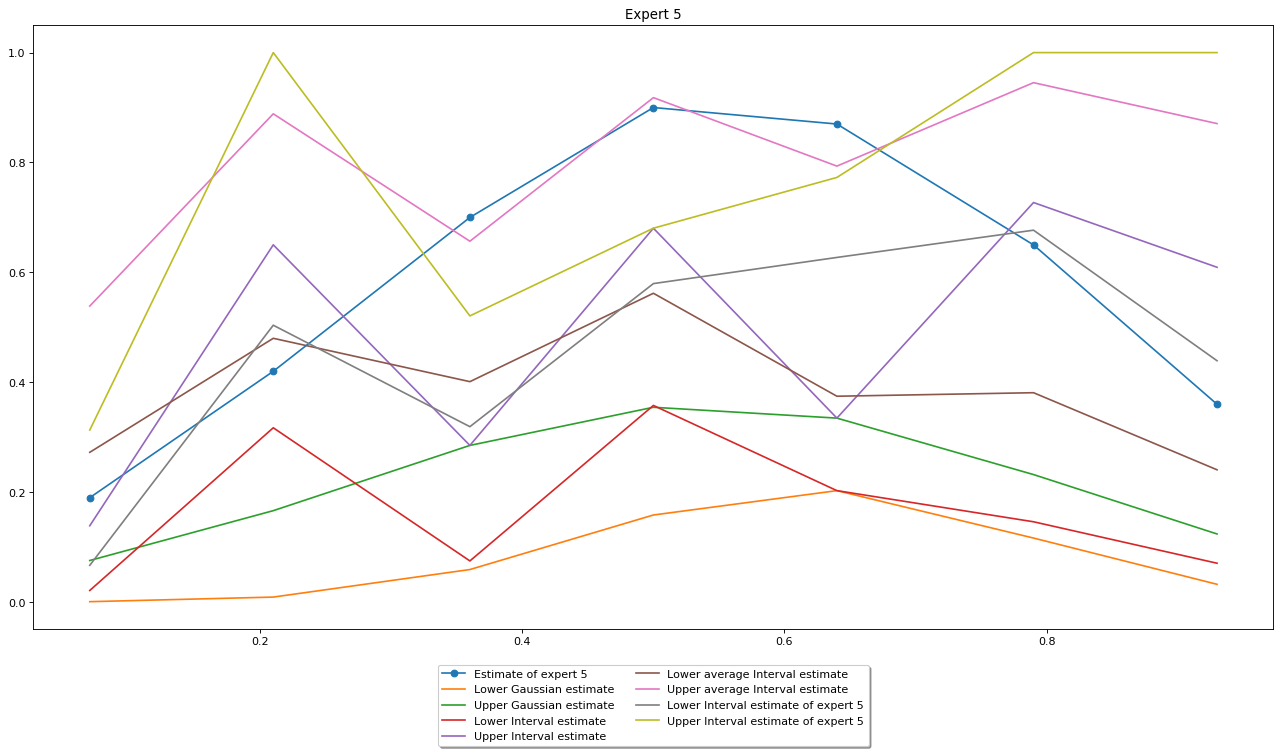

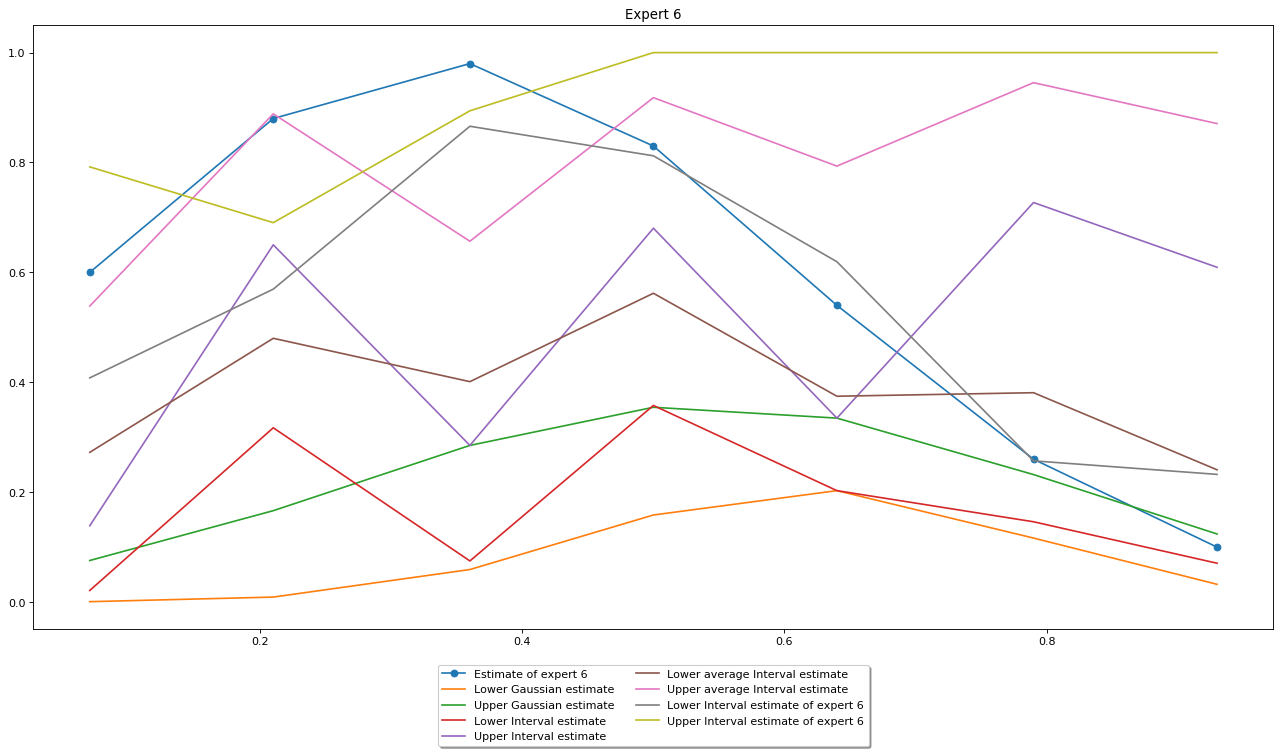

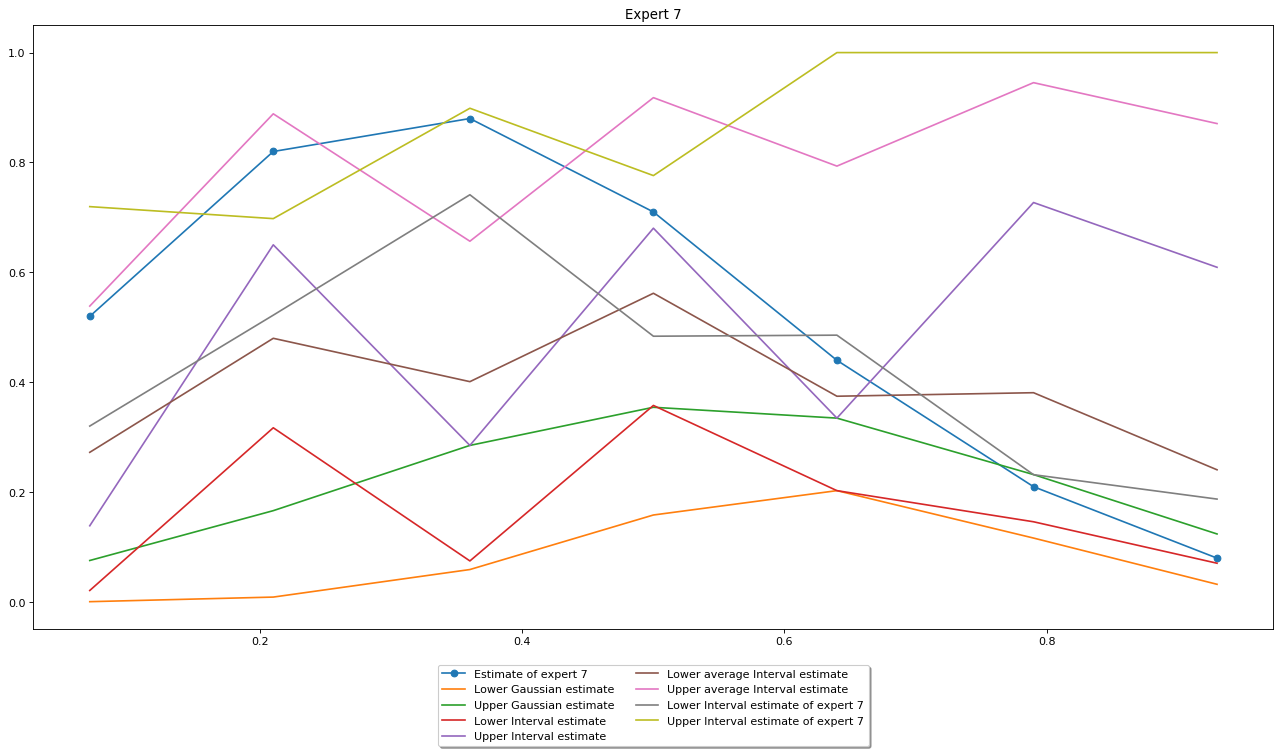

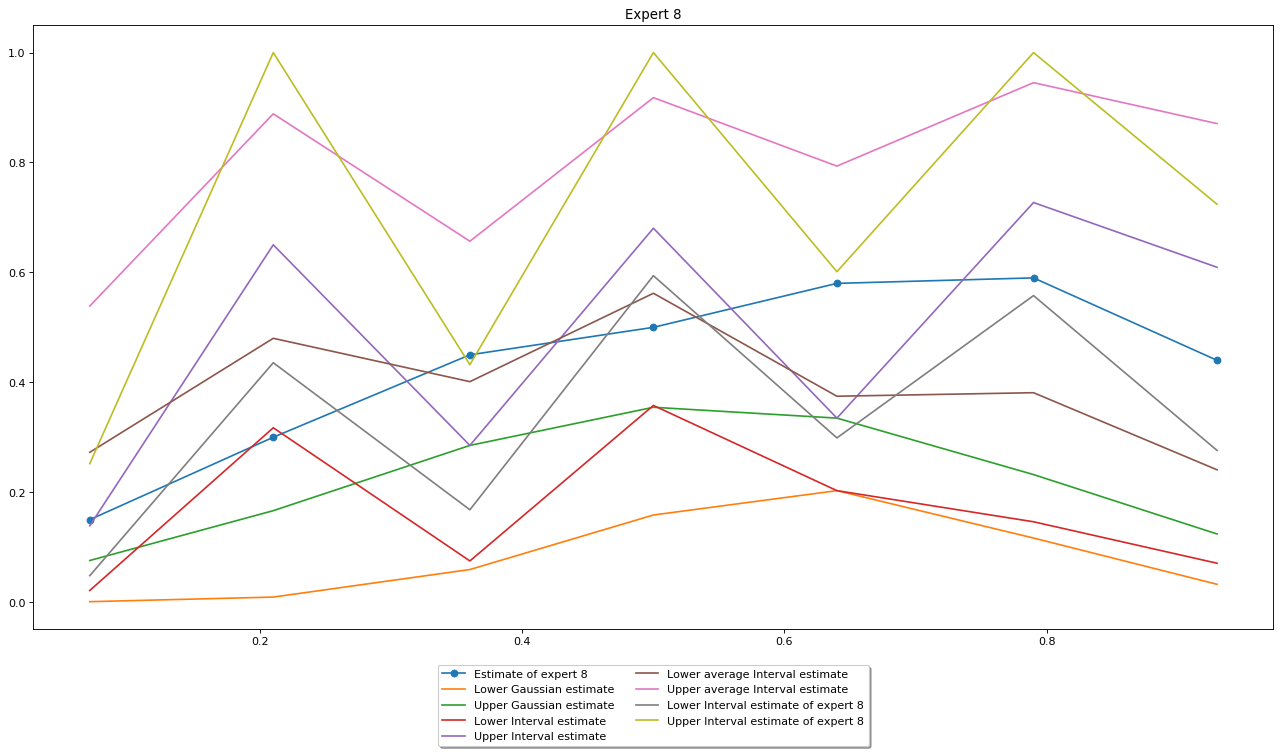

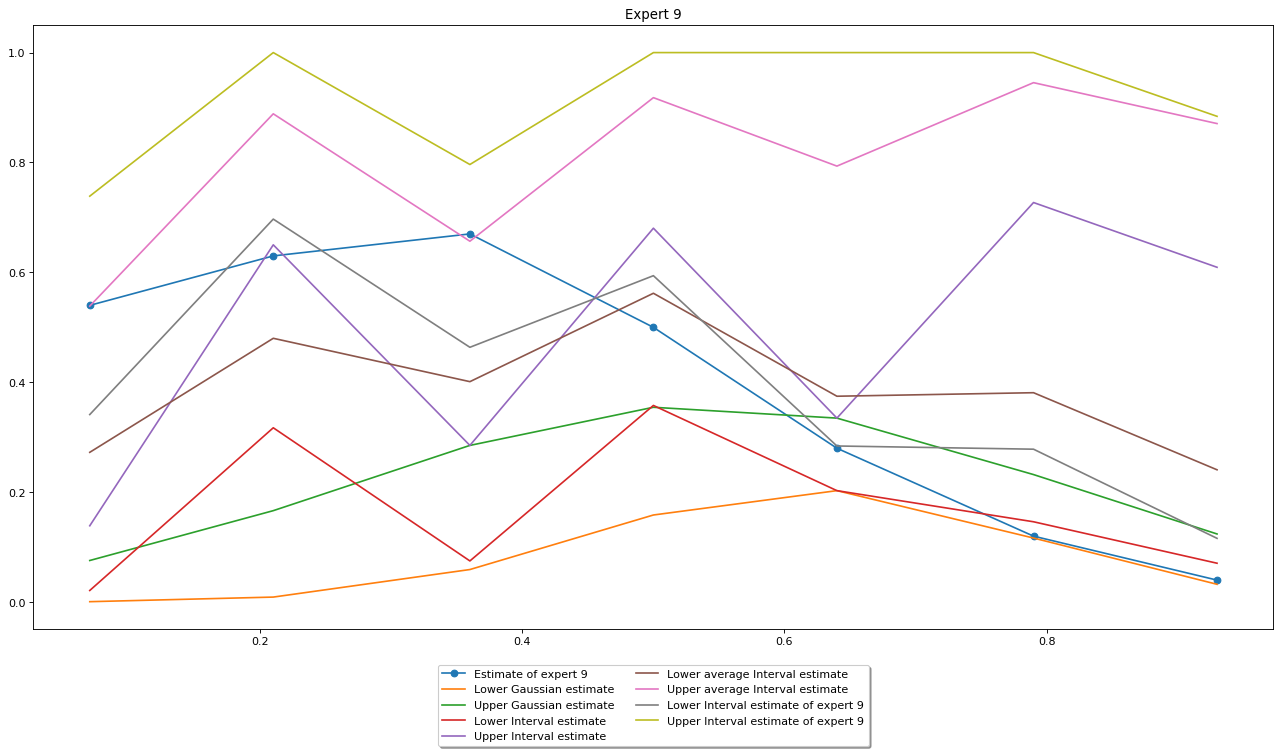

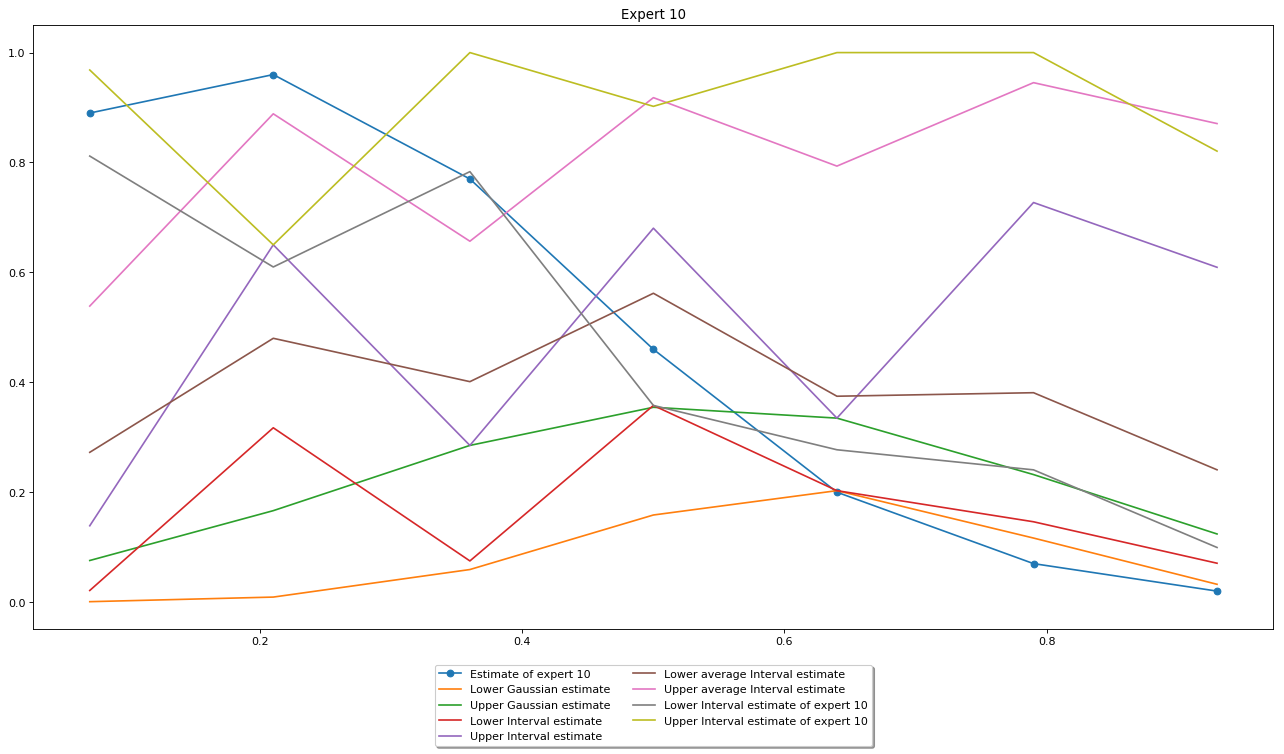

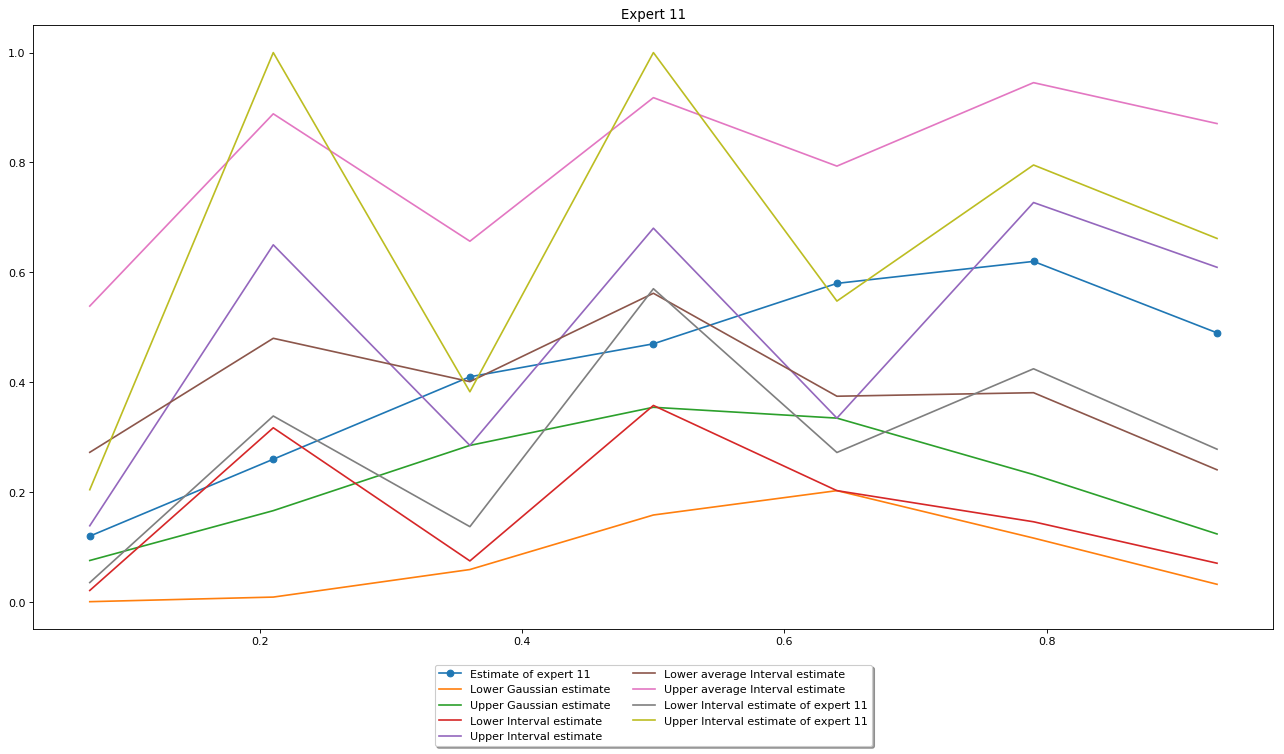

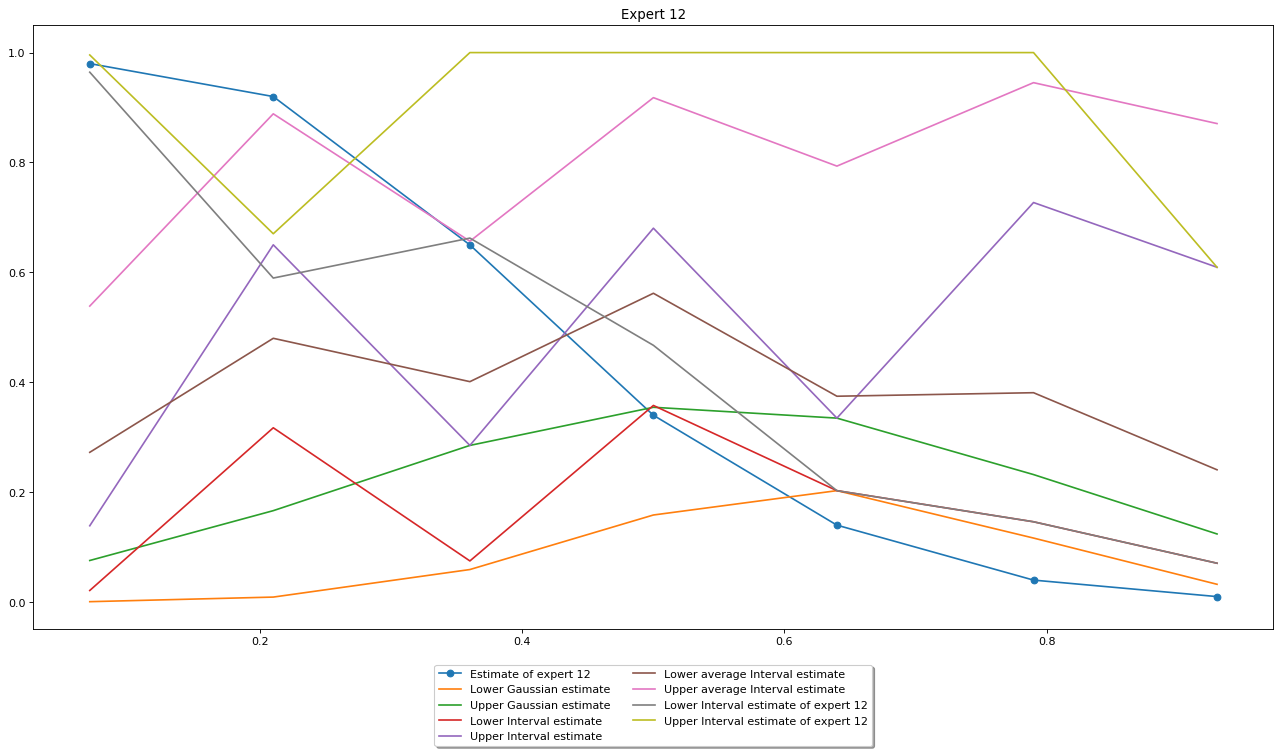

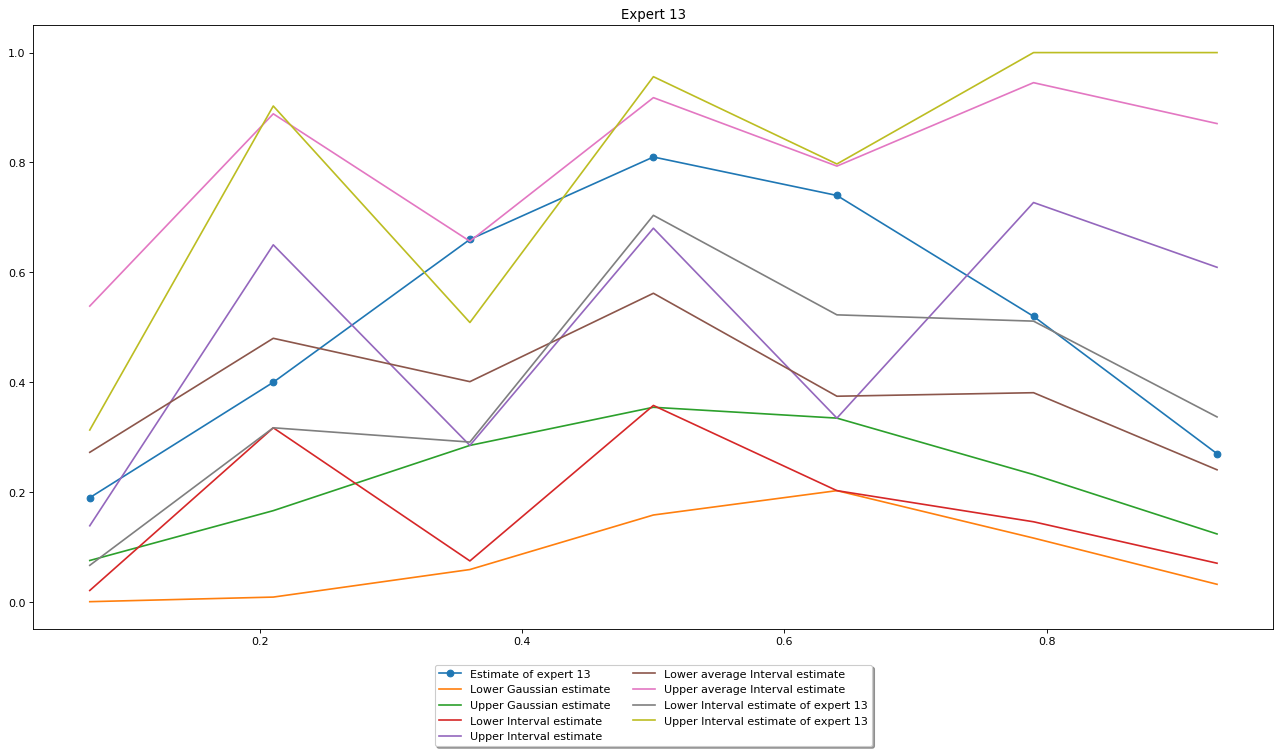

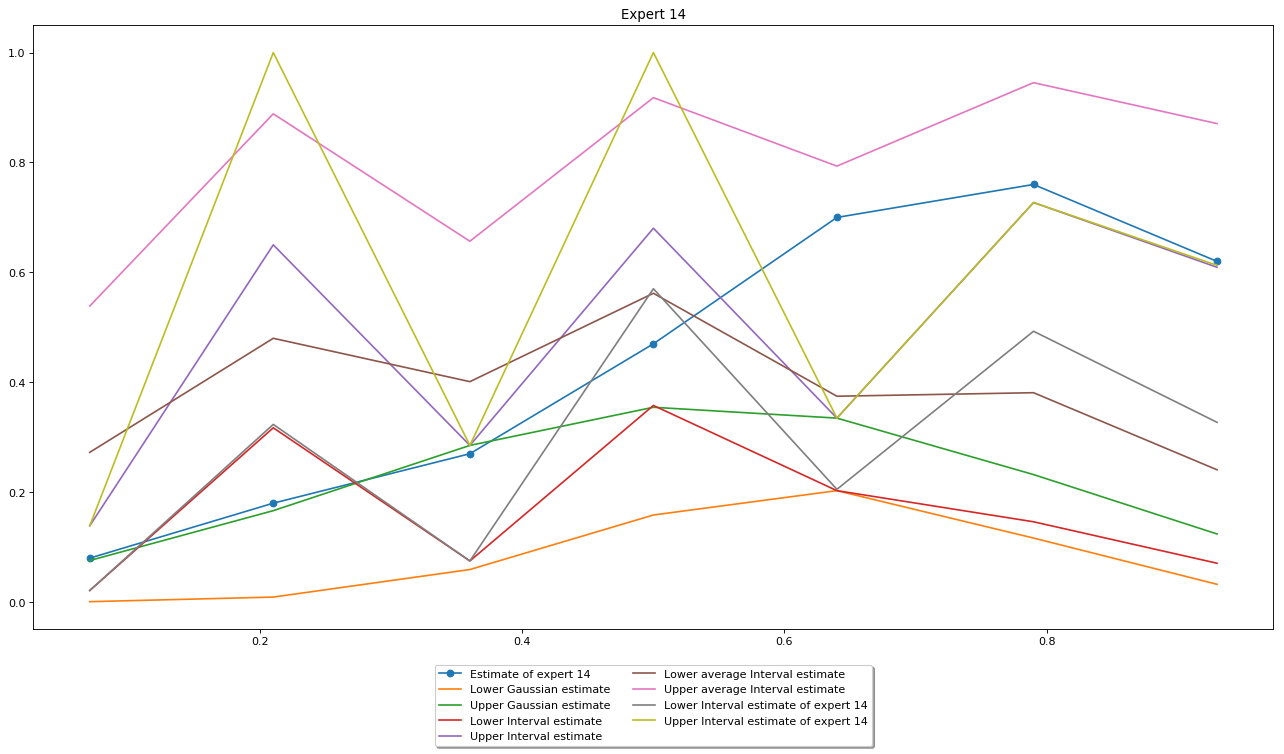

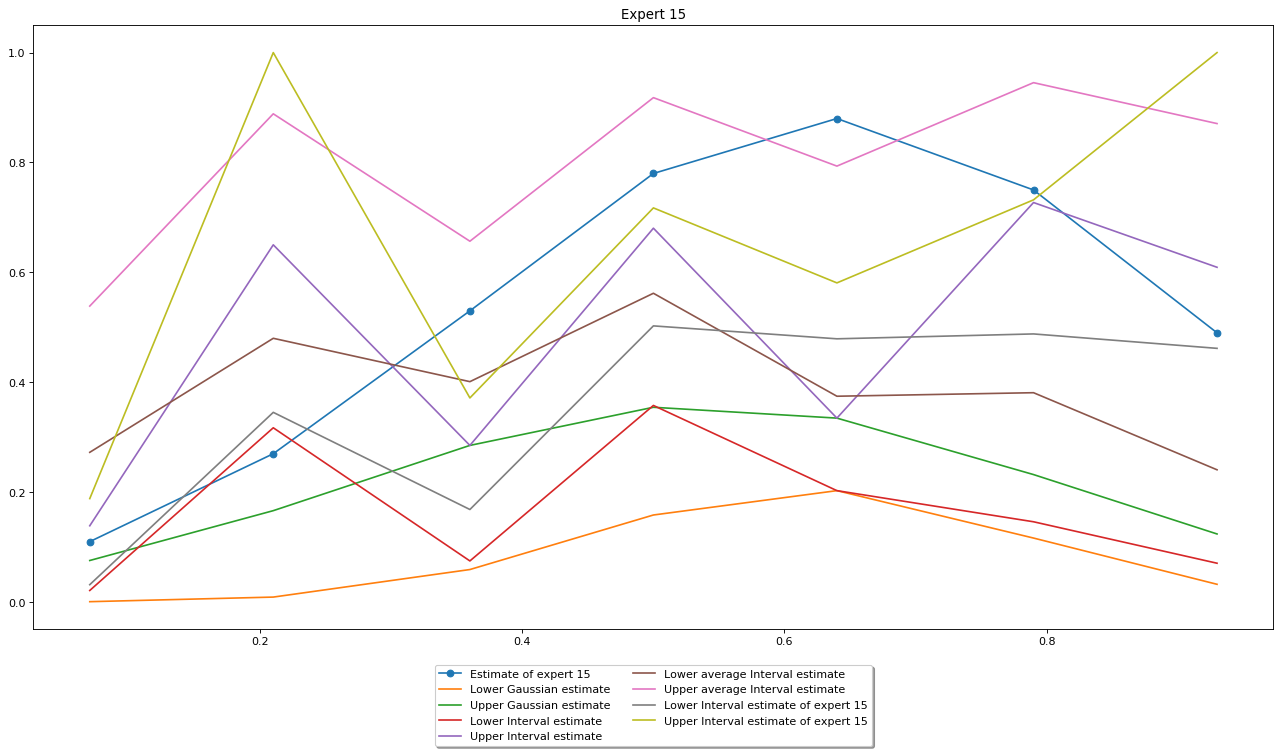

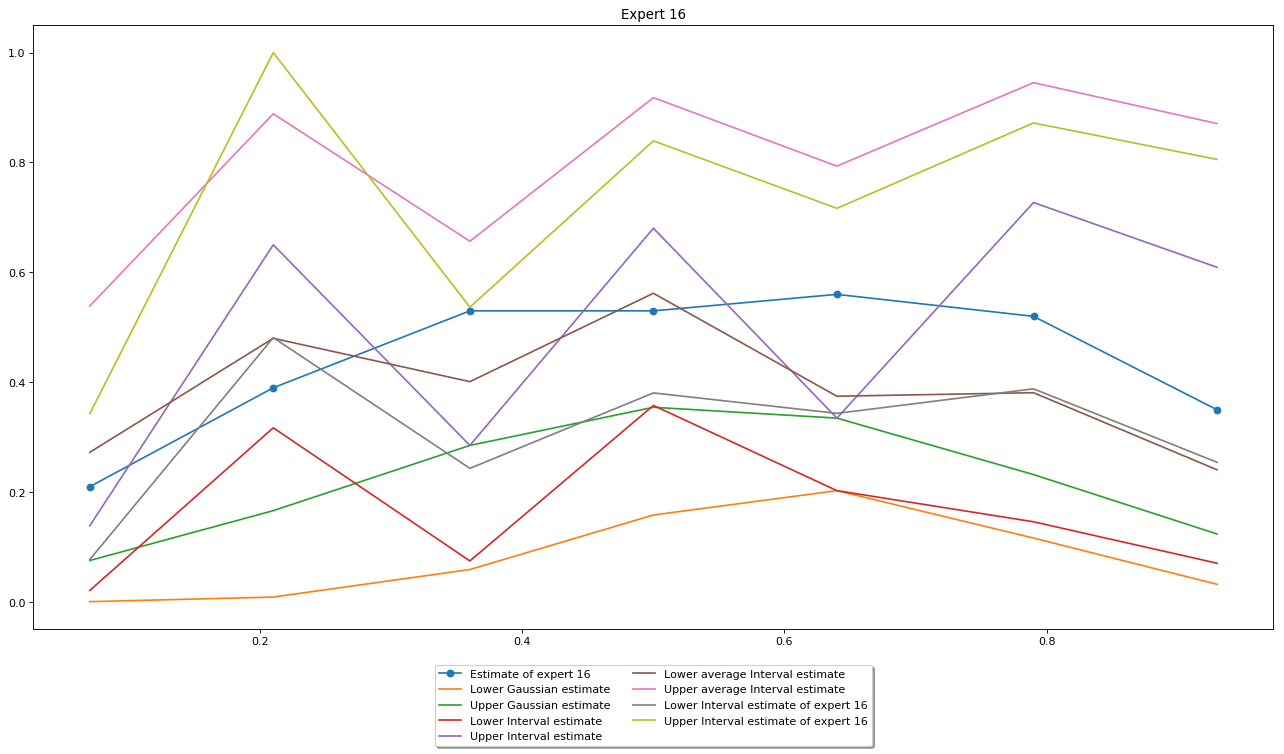

In [36]:

for i in range(experts):

    figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
    

    plt.plot(x, v0[i], '-o', label = 'Estimate of expert ' + str(i + 1))
    plt.plot(x, gauss_niz0, label = 'Lower Gaussian estimate')
    plt.plot(x, gauss_verh0, label = 'Upper Gaussian estimate')
    plt.plot(x, inter_integ_niz0, label = 'Lower Interval estimate')
    plt.plot(x, inter_integ_verh0, label = 'Upper Interval estimate')
    plt.plot(x, aver_niz0, label = 'Lower average Interval estimate')
    plt.plot(x, aver_verh0, label = 'Upper average Interval estimate')
    plt.plot(x, d_niz0[i], label = 'Lower Interval estimate of expert ' + str(i + 1))
    plt.plot(x, d_verh0[i], label = 'Upper Interval estimate of expert ' + str(i + 1))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
    plt.title('Expert '+ str(i + 1))